##  EE444/588 Project 3
Abu Bucker Siddik

In [1]:
import scipy as sp
import scipy.fft
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import glob
import time
import itertools 
import skimage.color
import math
import sys
%matplotlib inline 
plt.rcParams.update({'font.size': 12})

## (a) The Discrete Cosine Transform (DCT):
In this part, we explore the application of the DCT to a grayscale image and the resulting characteristics of the DCT coefficients. In particular, we explore the interpretation of the DCT as a set of basis images with which to represent an image, i.e., decomposition and recomposition. 

## (a-i) The DCT and IDCT:
We read the <b>mandrill.tif</b> image into variable <b>I</b> and display the <b>mandrill.tif</b> image.

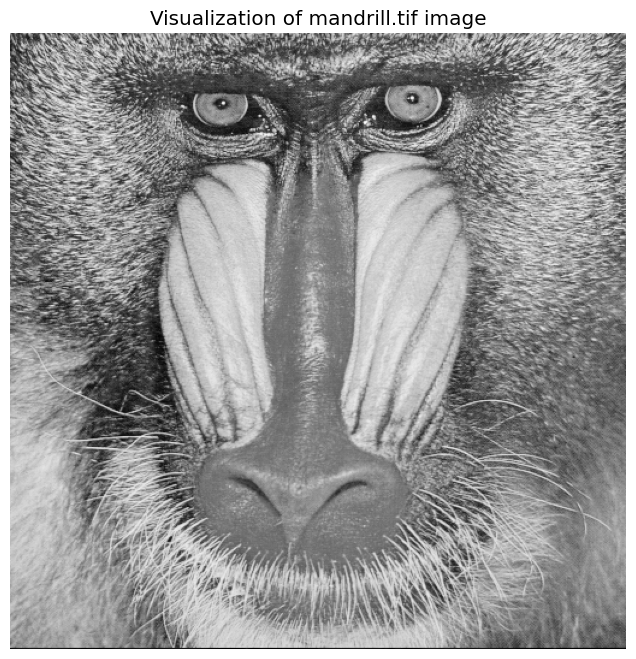

In [2]:
# Reading mandrill.tif
I = imageio.imread('mandrill.tif')

# Display mandrill.tif image
plt.figure(figsize=(10, 8)) 
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.title('Visualization of mandrill.tif image')
plt.show()

We define the first 8 rows and columns of the <b>mandrill.tif</b> as variable <b>I8</b> and print out the 
values of <b>I8</b>.

In [3]:
I8=I[0:8,0:8]
print('Values of I8: ', I8)

Values of I8:  [[147  56  47  90 138  92  58  30]
 [119 100  38  69  89  53  64  46]
 [ 76 115  44  46 100  59  59  46]
 [ 73 139  96  49  84 122  52  46]
 [ 86 125 132  48  78  86  74  47]
 [ 82  77 161  58  73  96  41  44]
 [ 41  50 136 130  73 124  52  62]
 [ 30  50 115 154  87 118  47  56]]


We compute the DCT of <b>I8</b> and call the variable <b>I8_DCT</b>. We print out the values
of <b>I8_DCT</b>.

In [4]:
# Compute the DCT of I8
I8_DCT= sp.fft.dct(sp.fft.dct(I8,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)

# print I8_DCT
print('Values of I8_DCT: ',I8_DCT)

Values of I8_DCT:  [[ 6.34375000e+02  8.61531406e+01 -7.90661487e+01  3.59418320e+01
  -3.51250000e+01 -2.95505330e+01  3.61327467e+01 -1.56786441e-01]
 [-2.21169646e+01  3.45160002e+01  8.05271755e+01  9.94535638e+01
   5.58395501e+01 -2.90154645e+01 -7.92256996e+01  2.76134853e+01]
 [ 1.07476821e+00 -3.25412001e+01 -5.89081935e+01  1.47484235e+01
   8.51839342e+01  5.93451867e+01  6.10983496e+00 -2.47594470e+01]
 [ 1.98080888e+01  2.79809334e+01  7.38867628e+00  1.01368151e+01
  -4.90480344e-01  2.46403559e+01  4.48118977e+01  4.08846781e+01]
 [ 2.86250000e+01  4.77142990e-01 -1.85152274e+01  1.93685529e+01
  -6.37500000e+00 -3.26443955e+00  2.66319437e+00 -8.59723372e+00]
 [ 1.04972376e+01 -1.72983687e+01 -2.82750108e+01  1.30077351e+01
  -2.37016429e+00 -5.40547490e+00  2.36216891e+01 -1.53223674e+01]
 [-1.27573948e+01  6.18899350e+00 -6.64016504e+00  8.51653496e+00
   8.68784229e+00 -9.45760085e+00  4.90819350e+00  2.19263923e+01]
 [-1.31339176e+00 -1.20191355e+01 -6.86388203e-01 

We compute the IDCT of <b>I8_DCT</b> and call the variable </b>I8_v2</b>. We print out the values of
<b>I8_v2</b>.

In [5]:
# Compute the IDCT of I8_DCT
I8_v2=sp.fft.idct(sp.fft.idct(I8_DCT,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)

# print I8_v2
print('Values of I8_v2: ',I8_v2)

Values of I8_v2:  [[147.  56.  47.  90. 138.  92.  58.  30.]
 [119. 100.  38.  69.  89.  53.  64.  46.]
 [ 76. 115.  44.  46. 100.  59.  59.  46.]
 [ 73. 139.  96.  49.  84. 122.  52.  46.]
 [ 86. 125. 132.  48.  78.  86.  74.  47.]
 [ 82.  77. 161.  58.  73.  96.  41.  44.]
 [ 41.  50. 136. 130.  73. 124.  52.  62.]
 [ 30.  50. 115. 154.  87. 118.  47.  56.]]


We compute the root mean-squared error (RMSE)  between <b>I8</b> and <b>I8_v2</b>.

In [6]:
I8_float=I8.astype(np.double)
MSE = np.square(np.subtract(I8_float,I8_v2)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I8 and I8_v2: ', RMSE)

RMSE between I8 and I8_v2:  2.343596392854643e-14


As the RMSE between <b>I8</b> and <b>I8_v2</b> is zero, it is verified that we have reconstructed the original 8×8 tile of the image without any losses.

## (a-ii) DCT Basis Images: 
In this part, we compute the 64 8×8 basis images for the DCT and store the 64 basis images 
in an 8×8×64 array <b>s</b>.

In [7]:
s = np.zeros((8, 8, 64))
M=s.shape[0]
N=s.shape[1]
m=0
for i in range(M):
    for j in range(N):
        
        I_DCT=np.zeros((8,8))
        I_DCT[i,j]=1
        I_v2=sp.fft.idct(sp.fft.idct(I_DCT,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
        s[:,:,m]=I_v2
        m=m+1
        

Using an 8×8 array of subplots, we display the 64 basis images. 

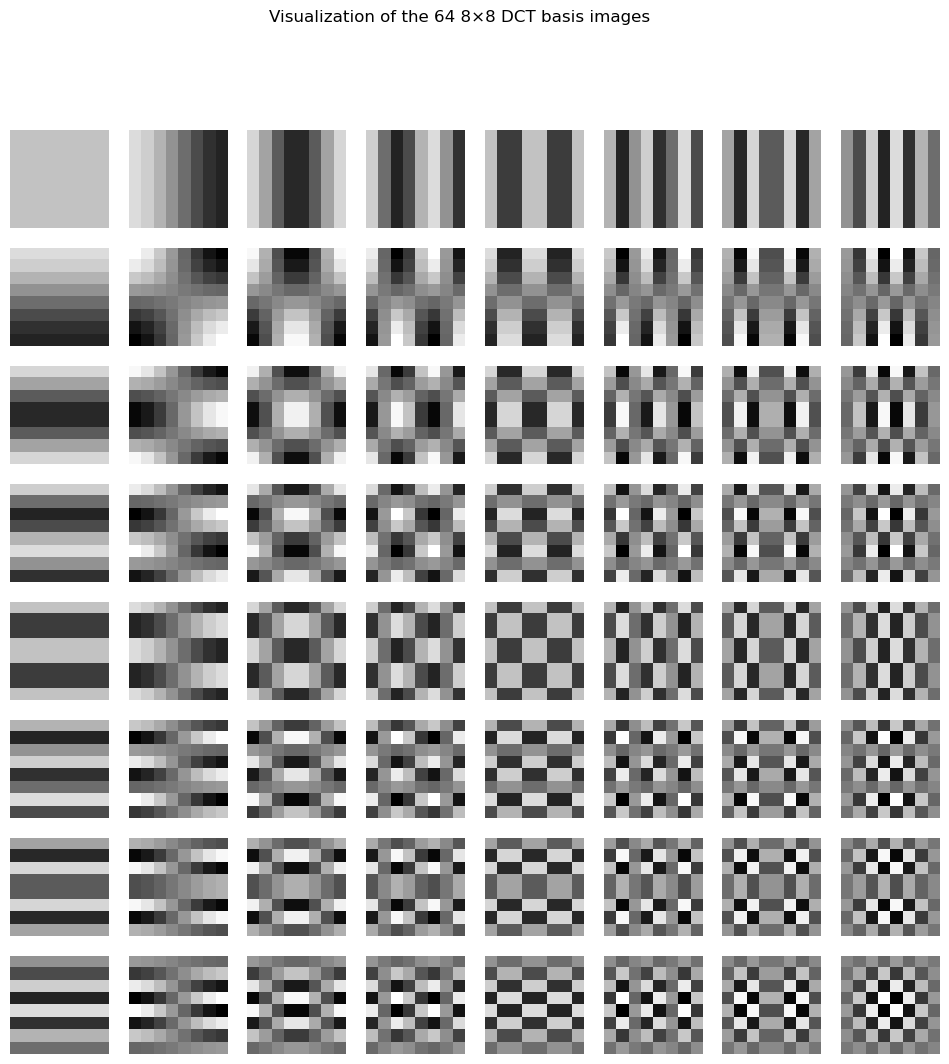

In [8]:
max_basis=s.max()
min_basis=s.min()
plt.figure(figsize=(12, 12)) 

for i in range(s.shape[2]):
    plt.subplot(M, N, i+1)
    plt.imshow(s[:,:,i], cmap = 'gray', vmin=min_basis, vmax=max_basis)
    plt.axis('off')
plt.suptitle('Visualization of the 64 8×8 DCT basis images', fontsize = 12)
plt.show()




We find that basis images are identical to Figure 6.10(c) of the Textbook.

## (a-iii) DCT of Image Tiles as Superposition of Basis Images I:
In this subpart, we replace each 8×8 tile in the <b>mandrill.tif</b> image with the basis image that most contributes to that tile. We loop over the <b>mandrill.tif</b> image and compute the DCT for each 8×8 tile.
For each tile, we determine which basis image has the largest contribution (positive or negative) by looking at the 64 DCT coefficients. Then we zero out all other DCT coefficients and compute the IDCT, returning an 8×8 image tile and put that tile in the same spatial location of a new image <b>I_1basis</b>. 

To perform the whole operation, we write a function <b>superposition_basis(I1, mm)</b>. 

In [9]:
def superposition_basis(I1, mm):
    # mm is the number of basis image considered
    I_basis= np.zeros((I1.shape[0],I1.shape[1]))
    for i in range(0, I1.shape[0], 8):
        for j in range(0, I1.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I1[i:i+8, j:j+8]
            I2_dct=np.zeros((8,8))
            I2_dct= sp.fft.dct(sp.fft.dct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            absolute=np.absolute(I2_dct)
            ind=np.argsort(absolute,axis=None)
            u,v=np.unravel_index(ind,absolute.shape)
            I2_z=np.zeros((8,8))
            for num in range(mm):
                I2_z[u[63-num], v[63-num]]=1
            I2_dct_new=I2_dct * I2_z
            I2_IDCT=sp.fft.idct(sp.fft.idct(I2_dct_new,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            I_basis[i:i+8, j:j+8]= I2_IDCT
            
    return I_basis
    

We compute and display <b>I_1basis</b> image. We also display the RMSE compared to the original image.

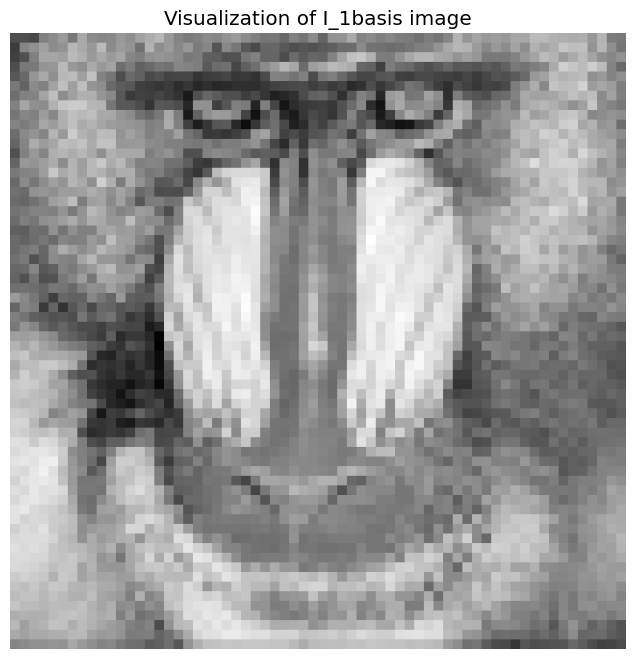

In [10]:
I_1basis=superposition_basis(I, 1)
# Display I_1basis image
plt.figure(figsize=(10, 8)) 
plt.imshow(I_1basis, cmap='gray')
plt.axis('off')
plt.title('Visualization of I_1basis image')
plt.show()

In [11]:
I_float=I.astype(np.double)
MSE = np.square(np.subtract(I_float,I_1basis)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I and I_1basis: ', RMSE)

RMSE between I and I_1basis:  27.20843826785355


We find that RMSE value between <b>I</b> and <b>I_1basis</b> is very large as we are considering only one basis image. For <b>I_1basis</b> image, each tile appear to have different artifacts with respect to each other. This is because basis image with largest contribution may change with each tile and also the value of DCT coefficient for the basis image may also change. As discrete cosine transform uses 2N point periodicity, it reduces high frequency artifacts compared to discrete fourier transform. As a result, we can find that <b>I_1basis</b> image is quite blury but still we can detect different shapes of the object.

## (a-iv) DCT of Image Tiles as Superposition of Basis Images II:
In this part, we perform same operation as part (a-iii), but we consider two basis images which have the
largest contribution (positive or negative). We display image <b>I_2basis</b>. Then we compute and display the RMSE compared to the original image.

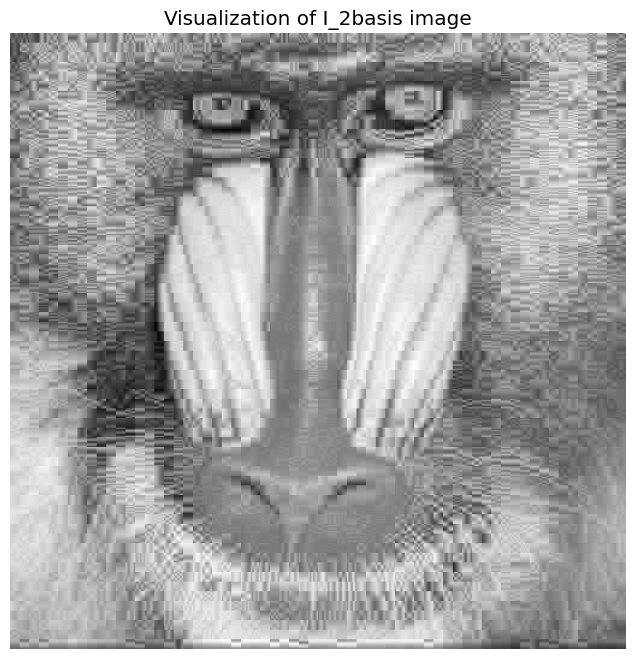

In [12]:
I_2basis=superposition_basis(I, 2)
# Display I_2basis image
plt.figure(figsize=(10, 8)) 
plt.imshow(I_2basis, cmap='gray')
plt.axis('off')
plt.title('Visualization of I_2basis image')
plt.show()

In [13]:
MSE = np.square(np.subtract(I_float,I_2basis)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I and I_2basis: ', RMSE)

RMSE between I and I_2basis:  23.18821181333991


We find that RMSE value between <b>I</b> and <b>I_2basis</b> is large as we are considering only two basis images. For <b>I_2basis</b> image, each tile appear to have different artifacts with respect to each other. This is because basis images with largest contribution may change with each tile and also the value of DCT coefficients for the basis images may also change. As discrete cosine transform uses 2N point periodicity, it reduces high frequency artifacts compared to discrete fourier transform. As we are considering two basis images with discrete cosine transform, the <b>I_2basis</b> image has more details compared to <b>I_1basis</b>. But <b>I_2basis</b> image still has lots of artifacts.

## (a-v) DCT of Image Tiles as Superposition of Basis Images III: 
We repeat the same process as in parts (a-iii) and (a-iv) for the top 1 through the top 64 (i.e., all) coefficients. We compute and plot the RMSE versus number of bases retained.

In [14]:
RMSE_loop=[]
for i in range(1, 65):
    I_basis=superposition_basis(I, i)
    MSE = np.square(np.subtract(I_float,I_basis)).mean() 
    RMSE=np.sqrt(MSE)
    RMSE_loop.append(RMSE)
    

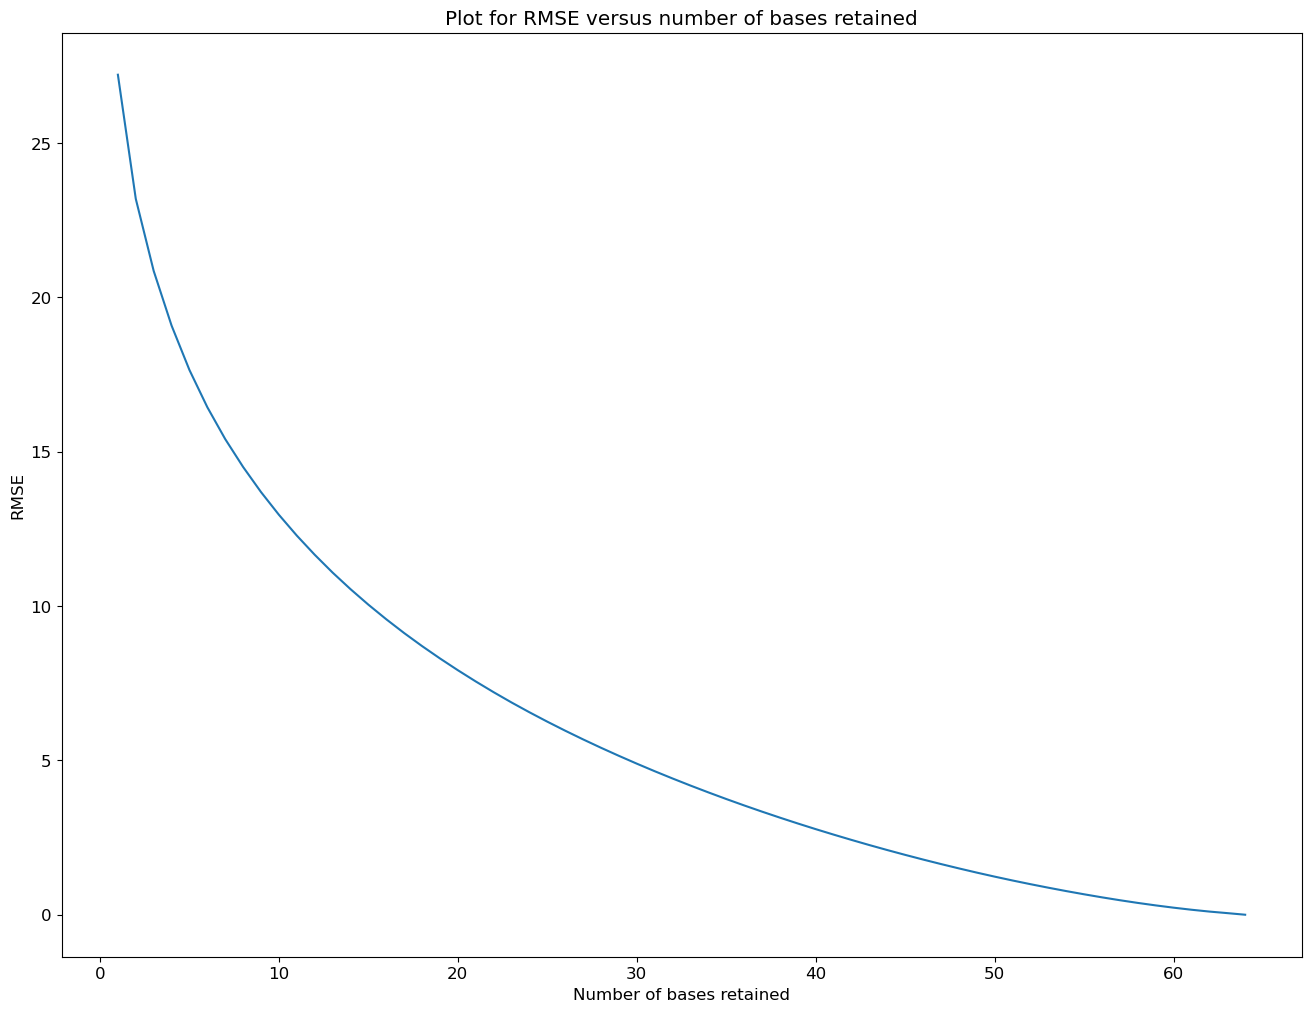

In [15]:
plt.figure(figsize=(16, 12)) 
plt.plot(range (1,65),RMSE_loop)
plt.xlabel('Number of bases retained')
plt.ylabel('RMSE')
plt.title('Plot for RMSE versus number of bases retained')
plt.show()

In [16]:
print('RMSE for 64 bases retained: ', RMSE_loop[63])

RMSE for 64 bases retained:  4.3968689175054486e-14


We observe that if we increase the number of bases retained, the RMSE is decreasing. This means that with the increment of number of bases retained, the image quality is improving. We get RMSE value of zero for 64 bases retained. We also find that RMSE is quite large (degradation is quite high) when we retain a few number of bases.

## (b) Entropy and the Effects of DCT on Entropy:
In this part, we explore the effects that the DCT has on entropy of an image representation.

## (b-i) Spatial Domain Image Entropy:
We compute and display the histogram of the <b>mandrill.tif</b> image.

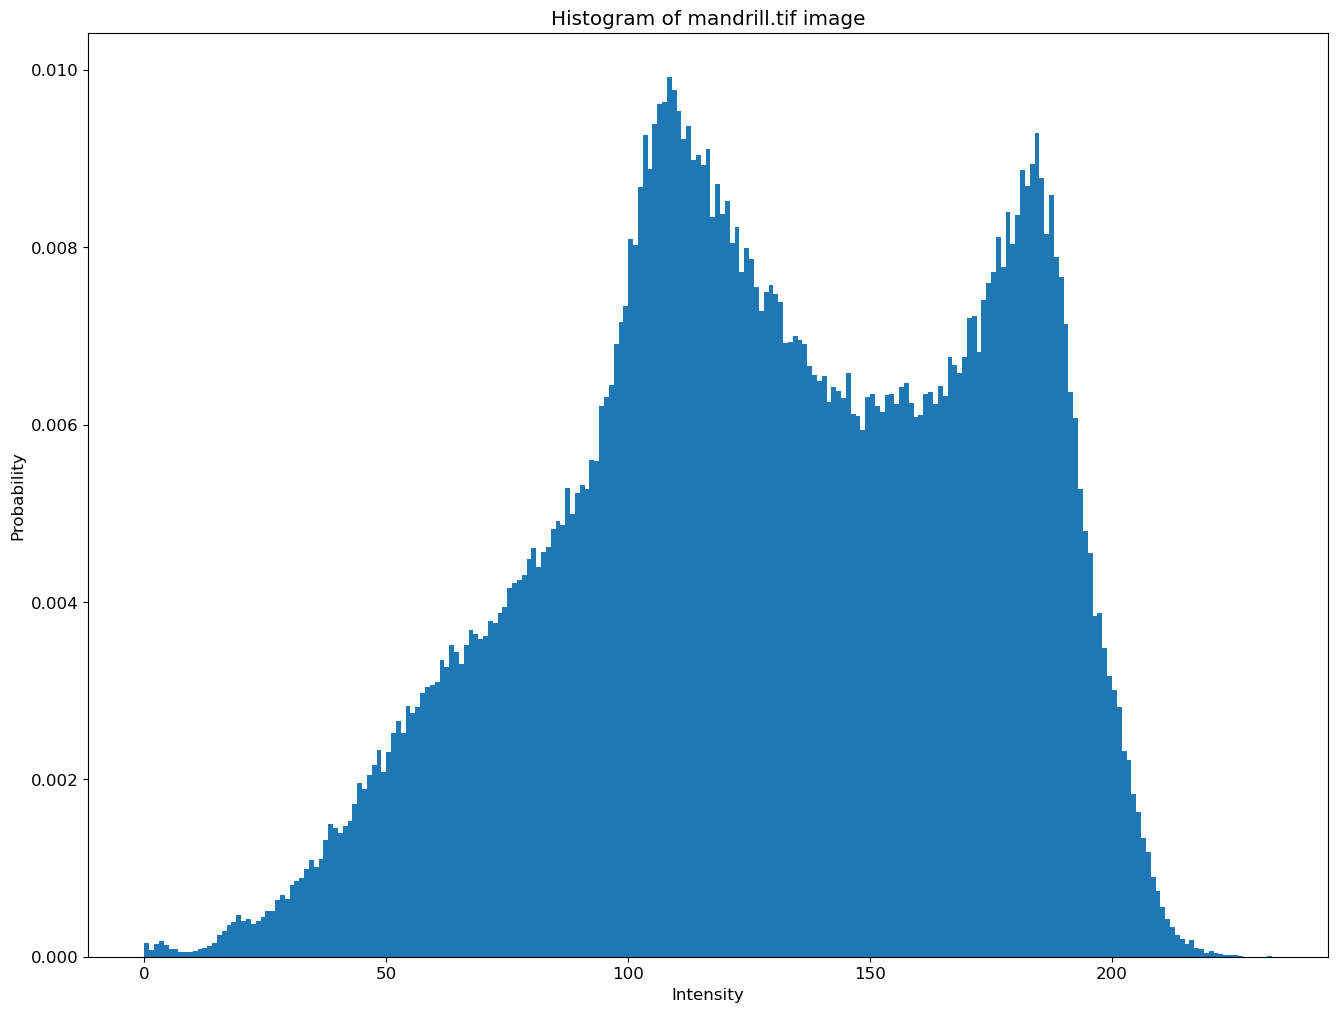

In [20]:
# Reading mandrill.tif
I = imageio.imread('mandrill.tif')
mini1=I.min()
maxi1=I.max()
bin_num1=maxi1-mini1+1
plt.figure(figsize=(16, 12)) 
plt.hist(I.flatten(),bins=bin_num1,range=(mini1,maxi1+1), density=True)
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.title('Histogram of mandrill.tif image')
plt.show()

We write a function <b>calculate_Entropy</b> to compute entropy of an image.


In [18]:
def calculate_Entropy(I):
    I = I.astype(int)
    mini=I.min()
    maxi=I.max()
    bin_num = maxi - mini + 1
    hist, bins=np.histogram(I.flatten(),bins=bin_num,range=(mini,maxi+1))
    hist1=hist/I.size
    index_R = np.where(hist1 == 0)
    p_r = np.delete(hist1, index_R)
    H = -np.sum(p_r * (np.log2(p_r)))
    return H
    
    
    

We compute and display the entropy <b>H</b> of the <b>mandrill.tif</b> image </b>I</b> in bits/pixel.

In [19]:
H=calculate_Entropy(I)
print('The entropy of the original spatial domain mandrill image is: ', H, 'bits/pixel')

The entropy of the original spatial domain mandrill image is:  7.380354040022121 bits/pixel


We find that the entropy of the original spatial domain <b>mandrill.tif</b> image is 7.38 bits/pixel. This means that if we want to represent the <b>mandrill.tif</b> image without loosing any information, we need minimum 7.38 bits/pixel. If we represent the <b>mandrill.tif</b> image with bits/pixel which is less than 7.38 bits/pixel, we will loose information.

## (b-ii) DCT of Image Tiles:
We loop over the <b>mandrill.tif</b> image and compute the DCT for each 8×8 tile. We store this 8×8 DCT tile in the same spatial locations of a matrix <b>I_DCT</b>. We visualize the tiled DCT image <b>I_DCT</b>. 

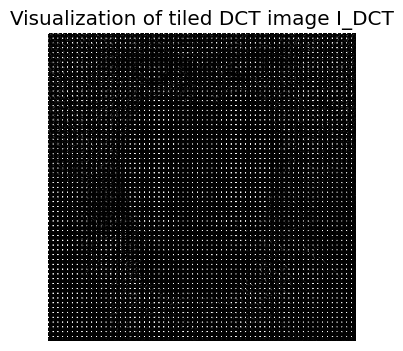

In [22]:
I_DCT= np.zeros((I.shape[0],I.shape[1]))
for i in range(0, I.shape[0], 8):
    for j in range(0, I.shape[1], 8):
        I2=np.zeros((8,8))
        I2=I[i:i+8, j:j+8]
        I2_dct=np.zeros((8,8))
        I2_dct= sp.fft.dct(sp.fft.dct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
        I_DCT[i:i+8, j:j+8]= I2_dct
        
# Display I_DCT image
plt.figure(figsize=(4, 4)) 
plt.imshow(I_DCT, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Visualization of tiled DCT image I_DCT')
plt.show()    

If we visualize <b>I_DCT</b> image, we observe the presence of different shapes of the original image. It seems that the discrete cosine transform coefficients carry the significant information for the original image, which will help to perform the image compression.

## (b-iii) DCT Domain Image Entropy I:
We round the tiled DCT image <b>I_DCT</b> to the nearest integer and call the variable <b>I_DCT_int</b>.

In [23]:
I_DCT_int = (np.round(I_DCT)).astype(int)


## Spatial domain implications of rounding the DCT domain:
We compute and display the IDCT for <b>I_DCT_int</b> and call the result <b>I_intbasis</b>.

In [24]:
I_intbasis = np.zeros((I_DCT_int.shape[0],I_DCT_int.shape[1]))
for i in range(0, I_DCT_int.shape[0], 8):
    for j in range(0, I_DCT_int.shape[1], 8):
        I2=np.zeros((8,8))
        I2=I_DCT_int[i:i+8, j:j+8]
        I2_idct=np.zeros((8,8))
        I2_idct= sp.fft.idct(sp.fft.idct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1) 
        I_intbasis[i:i+8, j:j+8]= I2_idct

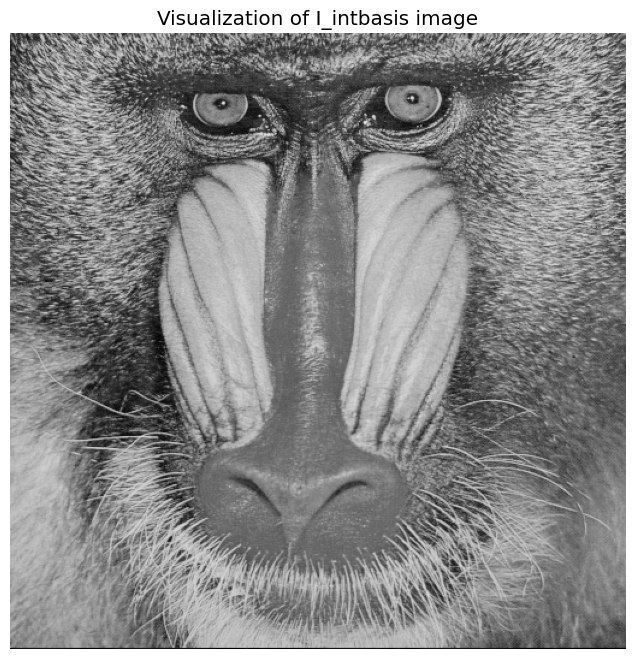

In [25]:
# Display I_intbasis image
plt.figure(figsize=(10, 8)) 
plt.imshow(I_intbasis, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Visualization of I_intbasis image')
plt.show()

We compute RMSE of I_intbasis compared to the original image I. We also compute the entropy of I_intbasis. 

In [26]:
MSE = np.square(np.subtract(I_float,I_intbasis)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I and I_intbasis: ', RMSE)

RMSE between I and I_intbasis:  0.28909825051864974


In [27]:
# Entropy of I_intbasis
H=calculate_Entropy(I_intbasis)
print('The entropy of I_intbasis: ', H, 'bits/pixel')

The entropy of I_intbasis:  7.38059172957528 bits/pixel


We find that there is no obvious difference between <b>I_intbasis</b> and original image <b>I</b>. RMSE between <b>I</b> and <b>I_intbasis</b> is 0.289, which is much smaller than the RMSE value of part (a). The entropy of <b>I_intbasis</b> is 7.38059 bits/pixel which is very close to the entropy value of the original 
image <b>I</b>.

## Entropy of the tiled DCT domain: 
We compute and display the histogram of the tiled DCT image <b>I_DCT_int</b>.

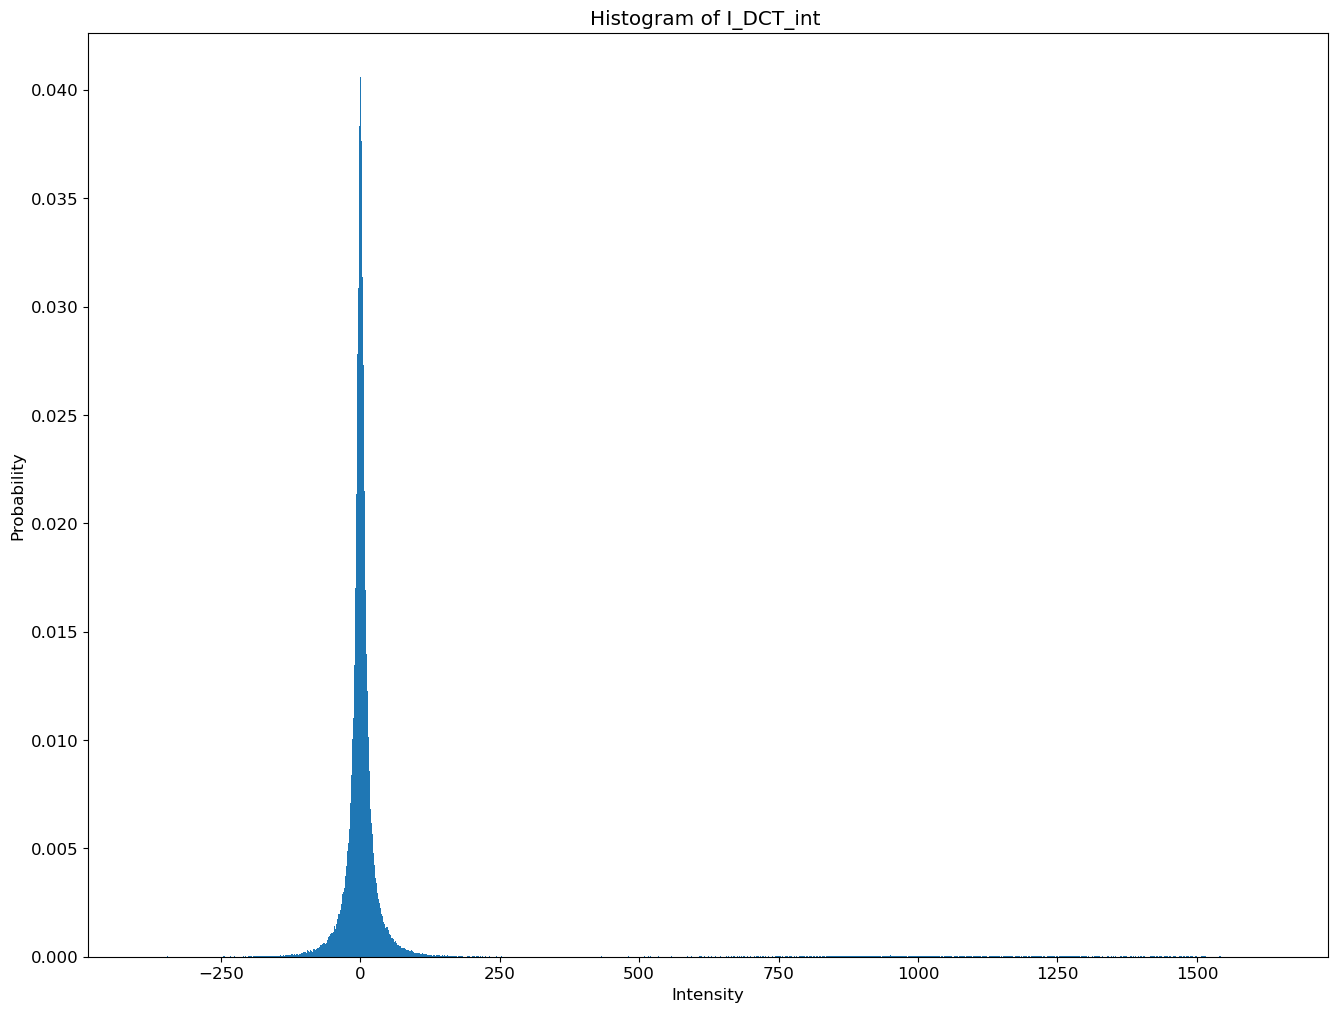

In [32]:
mini1=I_DCT_int.min()
maxi1=I_DCT_int.max()
bin_num1=maxi1-mini1+1
plt.figure(figsize=(16, 12)) 
plt.hist(I_DCT_int.flatten(),bins=bin_num1,range=(mini1,maxi1+1), density=True)
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.title('Histogram of I_DCT_int ')
plt.show()

We compute the entropy of <b>I_DCT_int</b> in bits/pixel.

In [33]:
# Entropy of I_DCT_int
H=calculate_Entropy(I_DCT_int)
print('The entropy of I_DCT_int: ', H, 'bits/pixel')

The entropy of I_DCT_int:  6.491461742307206 bits/pixel


We find that the histogram of the tiled DCT image <b>I_DCT_int</b> is very compact and has a high peak compared to histogram of original image <b>I</b>. The entropy of <b>I_DCT_int</b> (in DCT domain) is smaller compared to entropy of <b>I_intbasis</b> (in spatial domain). This implies that DCT domain  has the most potential for compression compared to spatial domain.

## (b-iv) DCT Domain Image Entropy II:
We repeat the same process as in part (a-v) where we keep only the top k , k=1,... ,64 bases for each 8×8 image tile using the <b>DCT_basis</b> function. We compute and plot the resultant tiled DCT entropy H_DCT versus k , the number of bases retained.

In [34]:
def DCT_basis(I1, mm):
    # mm is the number of basis image considered
    I_DCT= np.zeros((I1.shape[0],I1.shape[1]))
    for i in range(0, I1.shape[0], 8):
        for j in range(0, I1.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I1[i:i+8, j:j+8]
            I2_dct=np.zeros((8,8))
            I2_dct= sp.fft.dct(sp.fft.dct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            I2_dct=(np.round(I2_dct)).astype(int)
            absolute=np.absolute(I2_dct)
            ind=np.argsort(absolute,axis=None)
            u,v=np.unravel_index(ind,absolute.shape)
            I2_z=np.zeros((8,8))
            for num in range(mm):
                I2_z[u[63-num], v[63-num]]=1
            I2_dct_new=I2_dct * I2_z
            I_DCT[i:i+8, j:j+8]= I2_dct_new
            
    return I_DCT

In [35]:
H_DCT=[]
for i in range(1, 65):
    I_DCT=DCT_basis(I, i)
    H=calculate_Entropy(I_DCT)
    H_DCT.append(H)
    
    
    

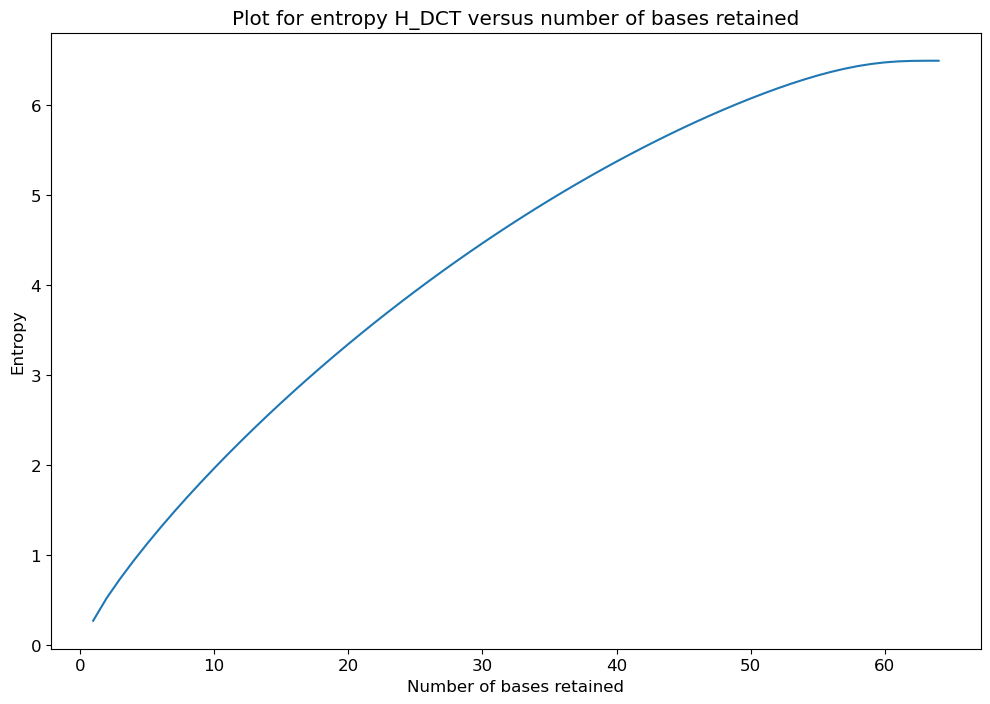

In [38]:
plt.figure(figsize=(12, 8)) 
plt.plot(range (1,65),H_DCT)
plt.xlabel('Number of bases retained')
plt.ylabel('Entropy')
plt.title('Plot for entropy H_DCT versus number of bases retained')
plt.show()

We plot the two entropies <b>H_DCT</b> and <b>H</b> versus number of bases retained in one figure, where <b>H</b> is entropy of the IDCT image I_intbasis.

In [39]:
def IDCT_basis(I1, mm):
    # mm is the number of basis image considered
    I_basis= np.zeros((I1.shape[0],I1.shape[1]))
    for i in range(0, I1.shape[0], 8):
        for j in range(0, I1.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I1[i:i+8, j:j+8]
            I2_dct=np.zeros((8,8))
            I2_dct= sp.fft.dct(sp.fft.dct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            I2_dct=(np.round(I2_dct)).astype(int)
            absolute=np.absolute(I2_dct)
            ind=np.argsort(absolute,axis=None)
            u,v=np.unravel_index(ind,absolute.shape)
            I2_z=np.zeros((8,8))
            for num in range(mm):
                I2_z[u[63-num], v[63-num]]=1
            I2_dct_new=I2_dct * I2_z
            I2_IDCT=sp.fft.idct(sp.fft.idct(I2_dct_new,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            I_basis[i:i+8, j:j+8]= I2_IDCT
            
    return I_basis

In [40]:
H_IDCT=[]
RMSE_basis=[]
for i in range(1, 65):
    I_DCT=IDCT_basis(I, i)
    H=calculate_Entropy(I_DCT)
    MSE = np.square(np.subtract(I_float,I_DCT)).mean() 
    RMSE=np.sqrt(MSE)
    H_IDCT.append(H)
    RMSE_basis.append(RMSE)
    

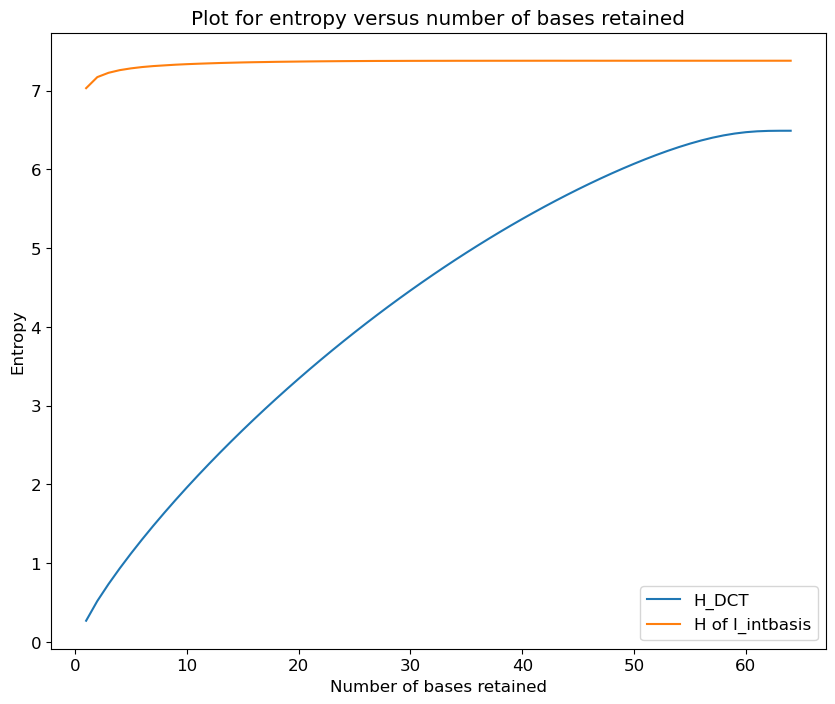

In [41]:
plt.figure(figsize=(10, 8)) 
plt.plot(range (1,65),H_DCT, label='H_DCT')
plt.plot(range (1,65),H_IDCT, label='H of I_intbasis')
plt.xlabel('Number of bases retained')
plt.ylabel('Entropy')
plt.title('Plot for entropy versus number of bases retained')
plt.legend();
plt.show()

We also plot the RMSE versus number of bases retained in another figure.

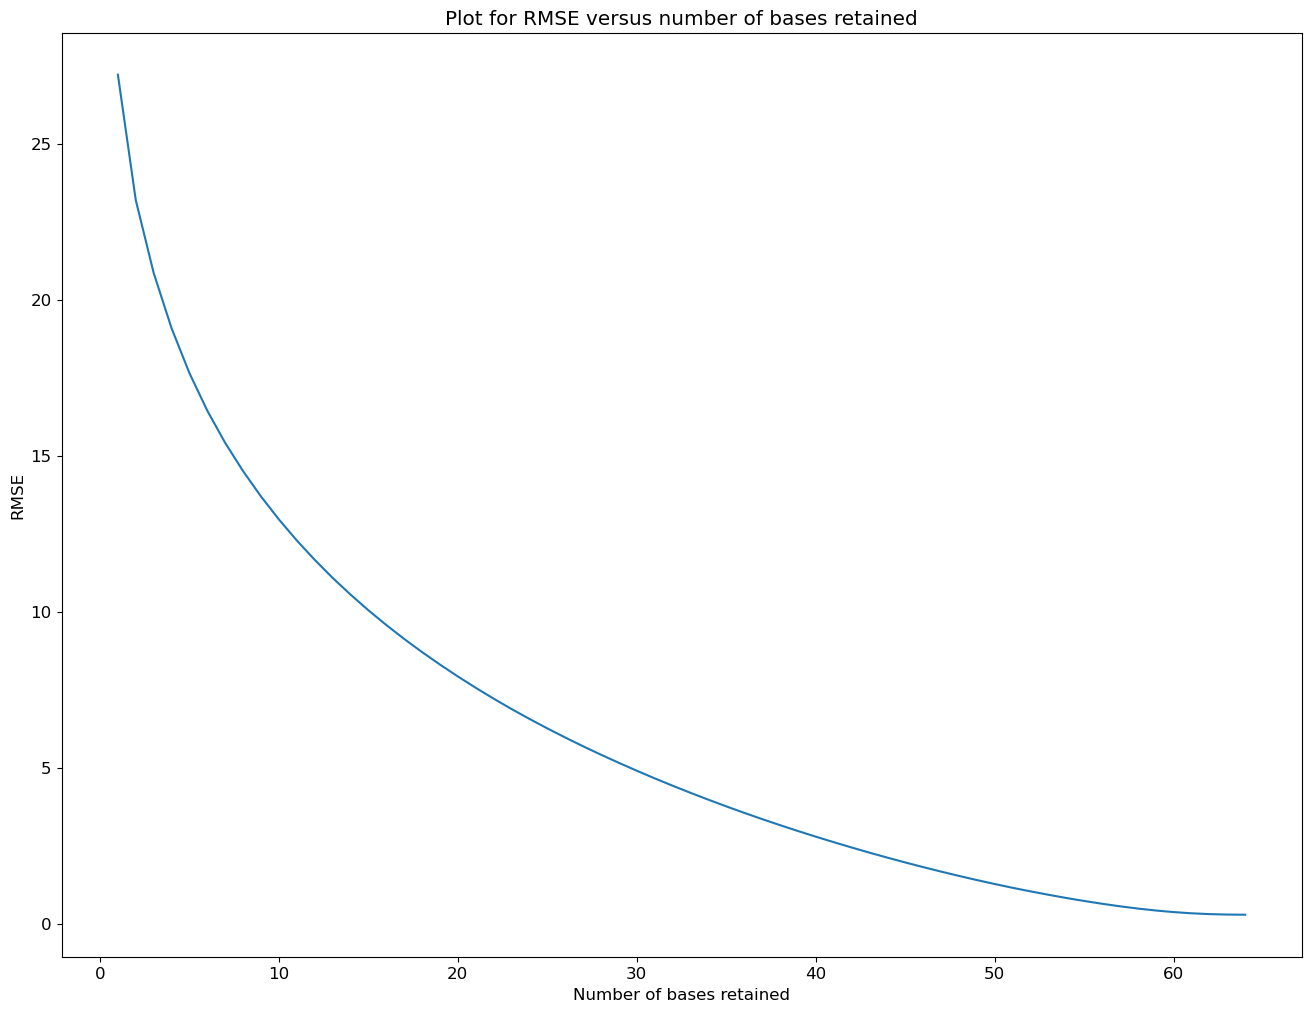

In [42]:
plt.figure(figsize=(16, 12)) 
plt.plot(range (1,65),RMSE_basis)
plt.xlabel('Number of bases retained')
plt.ylabel('RMSE')
plt.title('Plot for RMSE versus number of bases retained')
plt.show()

The entropy <b>H</b> in spatial domain is almost constant for different bases retained. On the other hand, the entropy <b>H_DCT</b> decreases if we decrease the number of bases retained. This implies that DCT domain has the most potential for compression. Although by obseving the RMSE plot we find that compression in DCT domain with smaller number of retained bases results in very larger RMSE (more artifacts introduced to the spatial domain). For this, we need to properly choose a acceptable RMSE, then use the number of retained bases with respect to that RMSE in the DCT domain to perform compression.

## (c) Huffman Codec
In this part, we work with a Huffman codec (coder-decoder) as applied to the <b>mandrill.tif</b> image
and its DCT.

## (c-i) Huffman Coded Image:

In [44]:
def huffman_codes(I):
    '''
    HUFFMAN_CODES [huff_codes,rev_huff_codes] = huffman_codes(I)
    This function computes a huffman code dictionary for the image I.  The 
    histogram of image I is used a a representation of the distribution of 
    intensities.
    Inputs: I: array - The image to be used to compute the histogram which is
                       used as the estimate of the proability density of 
                       intensities
    Outputs: huff_codes: container.Map - The forward code where the keys are
                         strings consisting of the intensities, e.g., '213'
                         and the values are strings consisting of the binary
                         codewords, e.g., '1001110'
             rev_huff_codes: container.Map - The reverse code where the keys
                             are strings consisting of the binary codewords,
                             e.g., '1001110' and the values are strings 
                             consisting of the intensities, e.g., '213'
    Written by Laura Boucheron 10/13/2020
    Notes:
    No error checking included here.  The function assumes a 2D image will be
    input.  It might work for a 1D vector, but has not been tested.  It will
    likely break if you input a 3D image.
    The input image is cast as in int64 which will introduce some small
    amount of error to the intensities.
    This function should be able to handle any range of intensities that can
    be represented by an int64 variable type.
    '''
    # Cast as integer just in case it isn't already
    I = I.astype(int)
    
    # Compute normalized histogram
    num_bins = len(range(I.min(),I.max()+1)) 
    [h,be] = np.histogram(I.flatten(),bins=num_bins,range=(I.min(),I.max()+1)) # compute histogram
    h = h/(I.shape[0]*I.shape[1]) # normalize histogram
    be = be.astype(int) # cast bin edges as integers
    be = be[:-1] # remove right-most bin edge which is I.max()+1
    # Remove zero probability entries
    be = be[h>0]
    h = h[h>0]
    
    # Create list of probabilities (zeroth column) and intensities (first column)
    h_be = list(zip(h,be.astype(str))) # cast intensities as strings to interpret as symbols
                          
    # Create copy of list of probabilities and intensities to modify in loop below
    h_be2 = h_be.copy()
    # Sort in ascending order of probabilities
    h_be2.sort()
    # Instantiate empty dictionary for Huffman codes (value to code word)
    huff_codes = {value[1]: None for value in h_be}
    # Loop over probabilities and merge two smallest until there is only one element left
    while len(h_be2)>1:
        prob0,values0_str = h_be2[0] # smallest probability
        prob1,values1_str = h_be2[1] # second smallest probability
        del h_be2[0:2] # remove the two smallest probabilities from the working list
        # Grab all symbols corresponding to the two probabilities in question
        values0 = values0_str.split(',') 
        values1 = values1_str.split(',') 
        # Loop over all symbols and prepend a zero to all symbols in the smallest probability 
        for value0 in values0: # 
            if huff_codes[value0]==None:
                huff_codes[value0] = '0'
            else:
                huff_codes[value0] = '0'+huff_codes[value0]
        # Loop over all symbols and prepend a one to all symbols in the second smallest probability
        for value1 in values1:
            if huff_codes[value1]==None:
                huff_codes[value1] = '1'
            else:
                huff_codes[value1] = '1'+huff_codes[value1]
    
        # Append the new merged probability and merged string of symbols
        h_be2.append((prob0+prob1,values0_str+','+values1_str))
        
        # Sort in ascending order of probabilities
        h_be2.sort()
    # Compute reverse Huffman code dictionary (code word to value)
    rev_huff_codes = {v: k for k, v in huff_codes.items()}
    
    # Return Huffman code dictionary and reverse Huffman code dictionary
    return huff_codes, rev_huff_codes

We use the spatial domain <b>mandrill.tif</b> image <b>I</b> to compute the Huffman
code table using the <b>huffman_codes.py</b> file provided on canvas. We write a function with syntax
<b>I_bits=huffman_encoder(I,huff_codes)</b> where <b>huff_codes</b> is the forward Huffman code table, and <b>I_bits</b> is the bitstream. Within this function, we code the spatial domain <b>mandrill.tif</b> image <b>I</b> as a bitstream using the Huffman code.

In [45]:
# Reading mandrill.tif
I = imageio.imread('mandrill.tif')
huff_codes, rev_huff_codes = huffman_codes(I)

def huffman_encoder(I,huff_codes):
    M=I.shape[0]
    N=I.shape[1]
    I_bits = "".join((f'{M:010b}', f'{N:010b}'))
    encoder=[]
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            I3=I2.flatten()
            for k in range(64):
                pix=I3[k]
                encoder.append(pix)
                
    for jj in range(len(encoder)):
        pix_str= str(encoder[jj])
        code_str=huff_codes[pix_str]
        I_bits = "".join((I_bits, code_str))
    return I_bits
    
    

In [46]:
I_bits=huffman_encoder(I,huff_codes)
print('First 20 bits of I_bits: ', I_bits[0:20])
print('First 40 bits of I_bits: ', I_bits[0:40])
print('Total bits needed to represent image I using Huffman Codec: ', len(I_bits))
print('Total bits needed to represent image I in uint8 representation: ', I.shape[0]*I.shape[1]*8)

First 20 bits of I_bits:  10000000001000000000
First 40 bits of I_bits:  1000000000100000000000000011111101001011
Total bits needed to represent image I using Huffman Codec:  1940549
Total bits needed to represent image I in uint8 representation:  2097152


In [48]:
print('Compression ratio with the Huffman coded image: ', 2097152/1940549)

Compression ratio with the Huffman coded image:  1.0807003585067938


We find that total bits needed to represent image <b>I</b> using Huffman Codec is smaller compared to uint8 representation. As a result, we get a compression ratio value of greater than 1 with the Huffman coded image.

## (c-ii) Huffman Coded DCT Image:
We use the integer-cast, tiled DCT domain image <b>I_DCT_int</b> to compute the Huffman code table using <b>huffman_codes.py</b>.

In [49]:
huff_codes_int, rev_huff_codes_int = huffman_codes(I_DCT_int)
I_bits_int=huffman_encoder(I_DCT_int,huff_codes_int)
print('First 20 bits of I_bits: ', I_bits_int[0:20])
print('First 40 bits of I_bits: ', I_bits_int[0:40])
print('Total bits needed to represent image I_DCT_int using Huffman Codec: ', len(I_bits_int))


First 20 bits of I_bits:  10000000001000000000
First 40 bits of I_bits:  1000000000100000000010000110001111100111
Total bits needed to represent image I_DCT_int using Huffman Codec:  1709555


In [50]:
Maxi=I_DCT_int.max()
Mini=I_DCT_int.min()
print(Mini)
print(Maxi)

-387
1633


In [51]:
s11=I_DCT_int.shape[0]
s22=I_DCT_int.shape[1]
print('Total bits needed to represent I_DCT_int with its native representation: ', 32*s11*s22)

Total bits needed to represent I_DCT_int with its native representation:  8388608


Original uint8 variable I requires 2097152 bits to represent <b>I</b> which is greater than  total bits needed to represent image <b>I_DCT_int</b>. As a result the compression ratio with image <b>I_DCT_int</b> is grater than 1.

In [52]:
print('Compression ratio with the Huffman coded image: ', 2097152/1709555)

Compression ratio with the Huffman coded image:  1.2267239135330539


## (c-iii) Huffman Decoder: 
We write a function <b>huffman_decoder(I_bits,rev_huff_codes)</b> which takes as input the bitstream <b>I_bits</b> and reverse Huffman code table <b>rev_huff_codes</b> and outputs the 2D image. This function assumes that the first 20 bits of the bistream <b>I_bits</b> corresponds to two 10-bit numbers which specify
the spatial extent of the image. The function further assumes that, after those first 20 bits, there are a variable number of bits corresponding to the Huffman code of the image. We use the <b>huffman_decoder</b> function to decode the bitstreams from both part (c-i) and (c-ii) and prove that we have decoded the representations with zero error.

In [53]:
def huffman_decoder(I_bits,rev_huff_codes):
    image=[]
    shape0=int(I_bits[0:10], 2)
    shape1=int(I_bits[10:20], 2)
    N_t=(shape0*shape1)/(8*8)
    N_tiles=int(N_t)
    image_bits=I_bits[20:]
    while image_bits:
        for code in rev_huff_codes:
            if image_bits.startswith(code):
                img_string=rev_huff_codes[code]
                image.append(int(img_string))
                length=len(code)
                image_bits=image_bits[length:]
                
    I_decoded=np.zeros((8,8,N_tiles))
    pp=0
    for mm in range(0, shape0*shape1, 64):
        I5=image[mm:mm+64]
        decode= np.array(I5)
        I_decoded[:,:,pp]=decode.reshape((8,8))
        pp=pp+1
    Final_image=np.zeros((shape0,shape1))
    pk=0
    for uu in range(0, shape0, 8):
        for vv in range(0, shape1, 8):
            Final_image[uu:uu+8, vv:vv+8]= I_decoded[:,:,pk]
            pk=pk+1
            
    return Final_image
   
      

In [54]:
I_decoded=huffman_decoder(I_bits,rev_huff_codes)

In [55]:
I_decoded_float=I_decoded.astype(np.double)
MSE = np.square(np.subtract(I_float,I_decoded_float)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I and I_decoded: ', RMSE)

RMSE between I and I_decoded:  0.0


In [56]:
I_DCT_decoded=huffman_decoder(I_bits_int,rev_huff_codes_int)

In [57]:
I_DCT_int_float=I_DCT_int.astype(np.double)
I_DCT_decoded_float=I_DCT_decoded.astype(np.double)

MSE = np.square(np.subtract(I_DCT_int_float,I_DCT_decoded_float)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I_DCT_int and I_DCT_int_decoded: ', RMSE)


RMSE between I_DCT_int and I_DCT_int_decoded:  0.0


The RMSE between <b>I</b> and <b>I_decoded</b> is zero. Also, the RMSE between <b>I_DCT_int</b> and <b>I_DCT_int_decoded</b> is zero. This proves that the <b>huffman_decoder</b> function works properly.

## (d) Block Transform Coding
In this part, we implement a threshold coding of the DCT coefficients of a grayscale image. This is a
main source of compression leveraged by the JPEG compression standard.

## (d-i) DCT of Offset Intensities: 
We offset the intensities of the <b>mandrill.tif</b> image by subtracting (2^k)−1 where k is the number of bits used to represent the image, i.e., 8 for a uint8 image. We call the resulting variable <b>I_offset</b>.
We loop over <b>I_offset</b> and compute the DCT for each 8×8 tile using <b>generating_DCT_tiles</b> function. We round each element of the 8×8 DCT tile to the nearest integer and store those coefficients in the same spatial locations of a matrix <b>I_DCT</b>. The variable <b>I_DCT</b> is thus an integer-valued, tiled DCT image. 

In [58]:
# Reading mandrill.tif
I = imageio.imread('mandrill.tif')
I_float=I.astype((np.double))
I_offset=I_float-128

In [59]:
def generating_DCT_tiles(I):
    I_DCT= np.zeros((I.shape[0],I.shape[1]))
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            I2_dct=np.zeros((8,8))
            I2_dct= sp.fft.dct(sp.fft.dct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            I_DCT[i:i+8, j:j+8]= I2_dct
    return I_DCT  

In [60]:
I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)

We use the <b>huffman_encoder</b> function to compute the bitstream <b>I_bits</b> for the </b>I_DCT</b>. We print out the first 40 bits of <b>I_bits</b> and the total number of bits in <b>I_bits</b>.

In [61]:
huff_codes, rev_huff_codes = huffman_codes(I_DCT)


In [62]:
I_bits=huffman_encoder(I_DCT,huff_codes)
print('First 20 bits of I_bits: ', I_bits[0:20])
print('First 40 bits of I_bits: ', I_bits[0:40])
print('Total bits in I_bits: ', len(I_bits))

First 20 bits of I_bits:  10000000001000000000
First 40 bits of I_bits:  1000000000100000000010000110000101110111
Total bits in I_bits:  1697679


The results are different from those in part (c-ii). This may happen due to first applying offsetting operation and then perform DCT.

## (d-ii) Threshold Coding:
We define normalization matrix Z as specified in Figure 8.27(b) of the textbook.
Using this normalization matrix, we apply a threshold coding to the tiles of <b>I_DCT</b> and call the result
<b>I_DCT_hat</b>.

In [63]:
Z = np.array([[16, 11, 10, 16, 24, 40, 51, 61], 
      [12, 12, 14, 19, 26, 58, 60, 55], 
      [14, 13, 16, 24, 40, 57, 69, 56],
      [14, 17, 22, 29, 51, 87, 80, 62],
      [18, 22, 37, 56, 68, 109, 103, 77], 
      [24, 35, 55, 64, 81, 104, 113, 92],
      [49, 64, 78, 87, 103, 121, 120, 101], 
      [72, 92, 95, 98, 112, 100, 103, 99]])

In [64]:
I_DCT_hat= np.zeros((I_DCT.shape[0],I_DCT.shape[1]))
for i in range(0, I_DCT.shape[0], 8):
    for j in range(0, I_DCT.shape[1], 8):
        I2=np.zeros((8,8))
        I2=I_DCT[i:i+8, j:j+8]
        I2_div=np.divide(I2,Z)
        I2_round=(np.round(I2_div))
        I_DCT_hat[i:i+8, j:j+8]= I2_round
        
        
        
    


In [65]:
I_DCT_hat=I_DCT_hat.astype(int)

In [66]:
n_zeros_I_DCT = np.count_nonzero(I_DCT==0)
n_zeros_I_DCT_hat = np.count_nonzero(I_DCT_hat==0)
print('Total number of coefficients in I_DCT that were identically zero: ', n_zeros_I_DCT)
print('Total number of coefficients in I_DCT_hat that are identically zero: ', n_zeros_I_DCT_hat)

Total number of coefficients in I_DCT that were identically zero:  10651
Total number of coefficients in I_DCT_hat that are identically zero:  193845


Total number of zero coefficients in <b>I_DCT_hat</b> increases significantly compared to <b>I_DCT</b>, which is as expected. We use <b>huffman_encoder</b> function to compute the bitstream <b>I_bits</b> for <b>I_DCT_hat</b>. We print out the first 40 bits of <b>I_bits</b> and the total number of bits in <b>I_bits<b>.

In [67]:
huff_codes, rev_huff_codes = huffman_codes(I_DCT_hat)
I_bits=huffman_encoder(I_DCT_hat,huff_codes)
print('First 20 bits of I_bits for I_DCT_hat: ', I_bits[0:20])
print('First 40 bits of I_bits for I_DCT_hat: ', I_bits[0:40])
print('Total bits in I_bits for I_DCT_hat: ', len(I_bits))

First 20 bits of I_bits for I_DCT_hat:  10000000001000000000
First 40 bits of I_bits for I_DCT_hat:  1000000000100000000001100010001001101001
Total bits in I_bits for I_DCT_hat:  509477


The number of total bits are much smaller compared to other parts of the project.

## (d-iii) Zig-zag Coding:
We modify the <b>huffman_encoder</b> function to implement a zig-zag pattern to the
coding of the bitstream. We call new function <b>huffman_encoder_zz</b>. The zig-zag pattern for each tile is implemented using the following matrix. Using the same <b>I_DCT_hat</b> from part (d-ii), we compute the bitstream <b>I_bits_zz</b>, and print the first 40 bits and the total number of bits. 

In [68]:
matrix=np.array([[0,1,5,6,14,15,27,28],
  [2,4,7,13,16,26,29,42],
  [3,8,12,17,25,30,41,43],
  [9, 11, 18, 24, 31, 40, 44, 53],
  [10, 19, 23, 32, 39, 45, 52, 54],
  [20,22,33,38,46,51,55,60],
  [21,34,37,47,50,56,59,61],
  [35, 36, 48, 49, 57, 58, 62, 63]])

In [69]:
def huffman_encoder_zz(I,huff_codes):
    M=I.shape[0]
    N=I.shape[1]
    DD=bin(M)[2:]
    EE=bin(N)[2:]
    I_bits_zz = "".join((DD, EE))
    zigzag_encoder=[]
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            for k in range(64):
                index=np.where(matrix==k)
                pix=(I2[index[0], index[1]]).tolist()
                zigzag_encoder.append(pix)
    En=[ii for List in zigzag_encoder for ii in List]
    for jj in range(len(En)):
        pix_str= str(En[jj])
        code_str=huff_codes[pix_str]
        I_bits_zz = "".join((I_bits_zz, code_str))
    
    return I_bits_zz
        
I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes)  


In [70]:
print('First 40 bits in I_bits_zz: ', I_bits_zz[0:40])
print('Total bits in I_bits_zz: ', len(I_bits_zz))

First 40 bits in I_bits_zz:  1000000000100000000001100010001001101001
Total bits in I_bits_zz:  509477


The total bits in <b>I_bits_zz</b> and <b>I_bits</b> are same. This is as expected because we are not performing any different operation for <b>I_bits_zz</b> and <b>I_bits</b> except scanning the <b>I_DCT_hat</b> using two different fashions.

## (d-iv) Exploring Run-lengths: 
We write code that can compute a histogram of 0 run-lengths, i.e., counts of how many subsequent 0-valued coefficients occur in the bitstream. First, we compute the 0 run-length histogram for <b>I_bits_zz</b> using <b>run_length_zz</b> and <b>hist_zeros</b> functions. We plot the histograms as a bar chart. 

In [72]:
def thresholding(I_DCT,scale):
    I_DCT_hat= np.zeros((I_DCT.shape[0],I_DCT.shape[1]))
    for i in range(0, I_DCT.shape[0], 8):
        for j in range(0, I_DCT.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I_DCT[i:i+8, j:j+8]
            I2_div=np.divide(I2,scale*Z)
            I2_round=(np.round(I2_div))
            I_DCT_hat[i:i+8, j:j+8]= I2_round
            
    return I_DCT_hat

In [73]:
I = imageio.imread('mandrill.tif')
I_float=I.astype((np.double))
I_offset=I_float-128

I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)

I_DCT_hat=thresholding(I_DCT,1) # using 1*Z
I_DCT_hat=I_DCT_hat.astype(int)

huff_codes, rev_huff_codes = huffman_codes(I_DCT_hat)

In [74]:
def run_length_zz(I,huff_codes):
    zigzag_encoder=[]
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            for k in range(64):
                index=np.where(matrix==k)
                pix=(I2[index[0], index[1]]).tolist()
                zigzag_encoder.append(pix)
    Enn=[ii for List in zigzag_encoder for ii in List]
    return Enn

In [75]:
def hist_zeros(zig):
    b=zig[0]
    pp=1
    a=[]
    for i in range(1,len(zig)):
        if zig[i] == b:
            pp = pp + 1
        else :
            a.append([b,pp])
            b = zig[i]
            pp=1
    a.append([b,pp])
    return a

In [76]:
zigzag_encoder=run_length_zz(I_DCT_hat,huff_codes)
run_l=hist_zeros(zigzag_encoder)
run_length = [ rr[1] for rr in run_l if 0  in rr ]
max_zero=max(run_length)

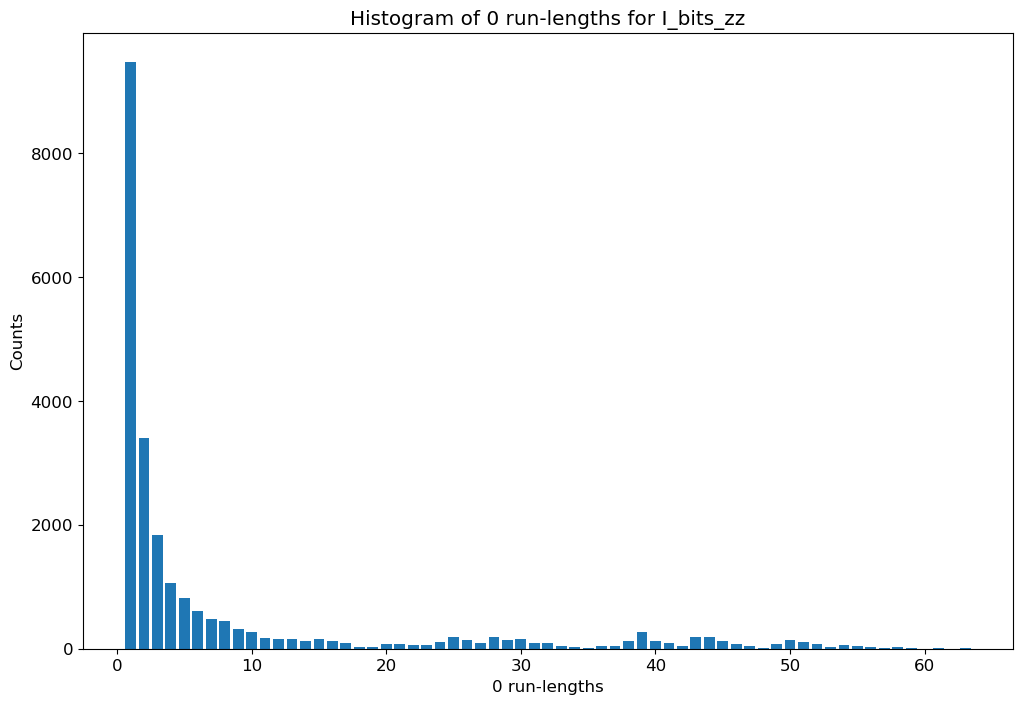

In [77]:
bar_height=[]
for i in range(1, max_zero+1):
    bar_y=run_length.count(i)
    bar_height.append(bar_y)
        
plt.figure(figsize=(12, 8)) 
plt.bar(range (1,max_zero+1),bar_height)
plt.xlabel('0 run-lengths')
plt.ylabel('Counts')
plt.title('Histogram of 0 run-lengths for I_bits_zz')
plt.show()

In [78]:
print('Bar height values for I_bits_zz: ', bar_height)

Bar height values for I_bits_zz:  [9471, 3402, 1836, 1054, 826, 602, 487, 452, 324, 277, 173, 159, 159, 118, 159, 118, 86, 26, 30, 72, 69, 57, 55, 103, 190, 133, 89, 183, 148, 161, 94, 95, 48, 24, 17, 39, 40, 121, 277, 130, 96, 44, 183, 195, 130, 84, 48, 10, 73, 140, 114, 75, 34, 61, 46, 31, 14, 24, 9, 2, 6, 2, 4]


We compute the 0 run-length histogram for <b>I_bits</b> using <b>run_leng</b> and <b>hist_zeros</b> functions. We plot the histograms as a bar chart.

In [79]:
def run_leng(I,huff_codes):
    encoder=[]
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            I3=I2.flatten()
            for k in range(64):
                pix=I3[k]
                encoder.append(pix)

    return encoder

In [80]:
raster=run_leng(I_DCT_hat,huff_codes)
run=hist_zeros(raster)
run_len= [ rr[1] for rr in run if 0  in rr ]
max_zero=max(run_len)


In [81]:
bar_height=[]
for i in range(1, max_zero+1):
    bar_y=run_len.count(i)
    bar_height.append(bar_y)

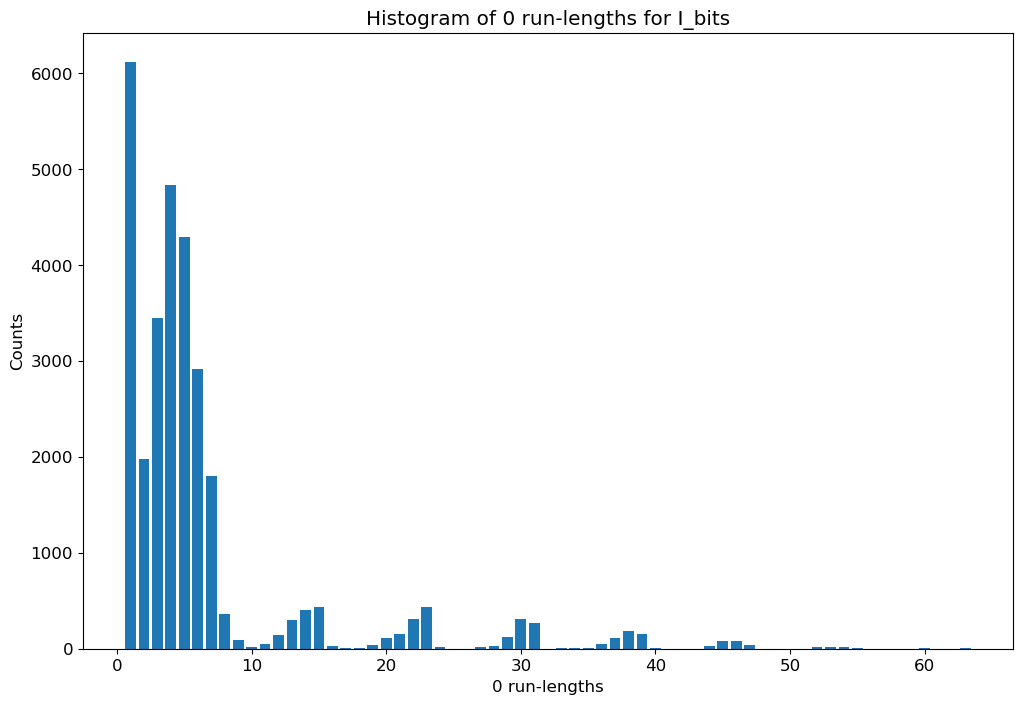

In [82]:
plt.figure(figsize=(12, 8)) 
plt.bar(range (1,max_zero+1),bar_height)
plt.xlabel('0 run-lengths')
plt.ylabel('Counts')
plt.title('Histogram of 0 run-lengths for I_bits')
plt.show()

In [83]:
print('Bar height values for I_bits: ', bar_height)

Bar height values for I_bits:  [6114, 1975, 3443, 4834, 4290, 2919, 1801, 358, 88, 23, 48, 139, 298, 408, 436, 32, 5, 8, 40, 110, 158, 305, 430, 17, 1, 2, 17, 29, 122, 311, 271, 2, 3, 3, 9, 49, 107, 180, 150, 4, 1, 0, 2, 25, 79, 77, 44, 1, 0, 0, 2, 13, 21, 18, 8, 0, 0, 0, 0, 6, 1, 2, 4]


By observing the histograms and bar height values, we can find that zig-zag encoding of DCT tiles results in more counts of longer runs of 0-valued coefficients compared to raster-scan approach.

## (d-v) Zig-zag Decoder: 
We modify <b>huffman_decoder</b> function to decode a zig-zag encoded bitstream and call the resulting function <b>huffman_decoder_zz</b>.

In [84]:
def huffman_decoder_zz(I_bits,rev_huff_codes):
    image=[]
    image_bits=I_bits[20:]
    shape0=int(I_bits[0:10], 2)
    shape1=int(I_bits[10:20], 2)
    N_t=(shape0*shape1)/(8*8)
    N_tiles=int(N_t)
    
    while image_bits:
        for code in rev_huff_codes:
            if image_bits.startswith(code):
                img_string=rev_huff_codes[code]
                image.append(int(img_string))
                length=len(code)
                image_bits=image_bits[length:]
    I_decoded=np.zeros((8,8,N_tiles))
    pp=0
    for mm in range(0, shape0*shape1, 64):
        I5=image[mm:mm+64]
        zigzag_decode=np.zeros((8,8))
        for nn in range(len(I5)):
            index=np.where(matrix==nn)
            zigzag_decode[index[0], index[1]]=I5[nn]
        I_decoded[:,:,pp]=zigzag_decode
        pp=pp+1
    Final_image=np.zeros((shape0,shape1))
    pk=0
    for uu in range(0, shape0, 8):
        for vv in range(0, shape1, 8):
            Final_image[uu:uu+8, vv:vv+8]= I_decoded[:,:,pk]
            pk=pk+1
            
       
        
    return Final_image
                    
                    
    
       
        
        
        

    
    

I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes)


In [86]:
I_DCT_hat_float=I_DCT_hat.astype(np.double)
I_decoded_hat_float=I_decoded.astype(np.double)

MSE = np.square(np.subtract(I_DCT_hat_float,I_decoded_hat_float)).mean() 
RMSE=np.sqrt(MSE)
print('RMSE between I_DCT_hat and I_decoded_hat: ', RMSE)

RMSE between I_DCT_hat and I_decoded_hat:  0.0


As the RMSE between <b>I_DCT_hat</b> and <b>I_decoded_hat</b> is zero, function <b>huffman_decoder_zz</b> is working properly.

## (d-vi) Image Quality versus Compression Ratio:
We write <b>thresholding</b> function for performing thresholding operation, <b>generating_decoded_denorm</b> function for performing denormalization operation, and  <b>generating_IDCT_tiles</b> function for performing tile IDCT operation. 

In [87]:
def thresholding(I_DCT,scale):
    I_DCT_hat= np.zeros((I_DCT.shape[0],I_DCT.shape[1]))
    for i in range(0, I_DCT.shape[0], 8):
        for j in range(0, I_DCT.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I_DCT[i:i+8, j:j+8]
            I2_div=np.divide(I2,scale*Z)
            I2_round=(np.round(I2_div))
            I_DCT_hat[i:i+8, j:j+8]= I2_round
            
    return I_DCT_hat
            
        
    
    

In [88]:
def generating_decoded_denorm(I_decoded,scale):
    I_decoded_denorm=np.zeros((I_decoded.shape[0],I_decoded.shape[1]))
    for i in range(0, I_decoded.shape[0], 8):
        for j in range(0, I_decoded.shape[1], 8):
            I22=np.zeros((8,8))
            I22=I_decoded[i:i+8, j:j+8]
            I_denorm=np.multiply(I22, scale*Z) 
            I_decoded_denorm[i:i+8, j:j+8]=I_denorm
            
    return I_decoded_denorm
        
    
    

In [89]:
def generating_IDCT_tiles(I):
    I_IDCT= np.zeros((I.shape[0],I.shape[1]))
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            I2_idct=np.zeros((8,8))
            I2_idct=sp.fft.idct(sp.fft.idct(I2,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            I_IDCT[i:i+8, j:j+8]= I2_idct
    return I_IDCT  

We generate a plot of compression ratio versus scale factors [1,2,4,8,16,32] of the normalization matrix Z, i.e., we compute the compression ratio when we code with normalization matrix Z, 2*Z, 4*Z, 8*Z, 16*Z, and 32Z. We also generate a plot of image quality in RMSE versus compression ratio.

In [90]:
I = imageio.imread('mandrill.tif')
I_float=I.astype((np.double))
I_offset=I_float-128

I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)

sc=[1, 2, 4, 8, 16, 32]
b=I.shape[0]*I.shape[1]*8
com_ratio=[]
RMSE_com=[]

compresses_Image=np.zeros((512,512,6))
for i in range(len(sc)):
    scale=sc[i]
    I_DCT_hat=thresholding(I_DCT,scale)
    I_DCT_hat=I_DCT_hat.astype(int)
    huff_codes, rev_huff_codes = huffman_codes(I_DCT_hat)
    I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes)
    com_r=b/len(I_bits_zz)
    com_ratio.append(com_r)
    I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes)
    I_decoded_denorm=generating_decoded_denorm(I_decoded,scale)
    reconst_offset=generating_IDCT_tiles(I_decoded_denorm)
    reconstructed_image=reconst_offset + 128
    Final_reconstruct=(np.round(reconstructed_image)).astype(int)
    compresses_Image[:,:,i]=Final_reconstruct
    Final_reconstruct_float=Final_reconstruct.astype((np.double))
    MSE = np.square(np.subtract(I_float,Final_reconstruct_float)).mean() 
    RMSE=np.sqrt(MSE)
    RMSE_com.append(RMSE)
    
    
    
    
    


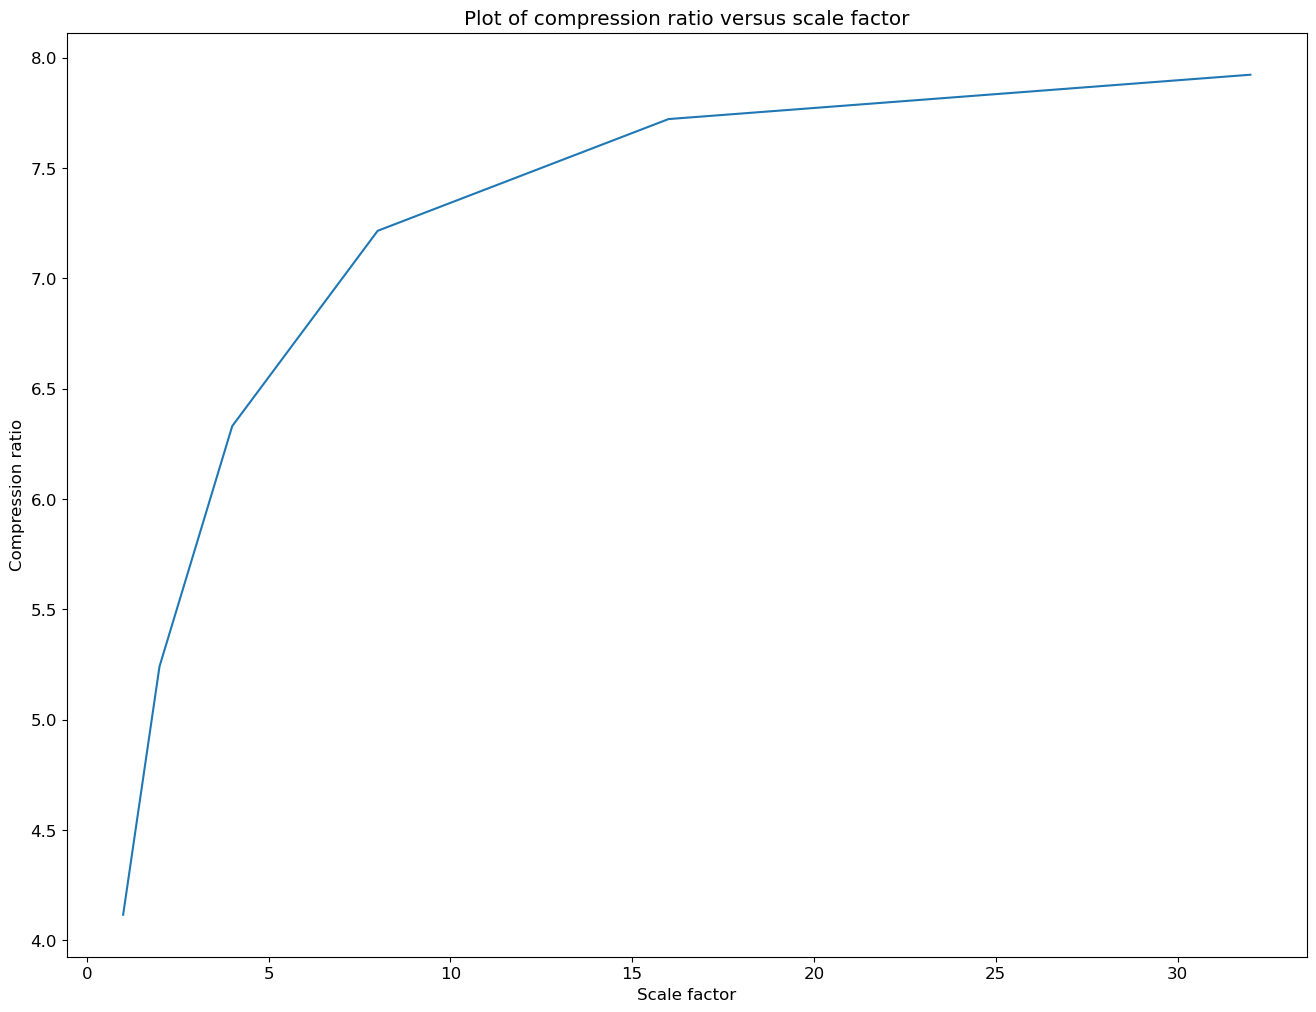

In [91]:
plt.figure(figsize=(16, 12)) 
plt.plot(sc,com_ratio)
plt.xlabel('Scale factor')
plt.ylabel('Compression ratio')
plt.title('Plot of compression ratio versus scale factor')
plt.show()

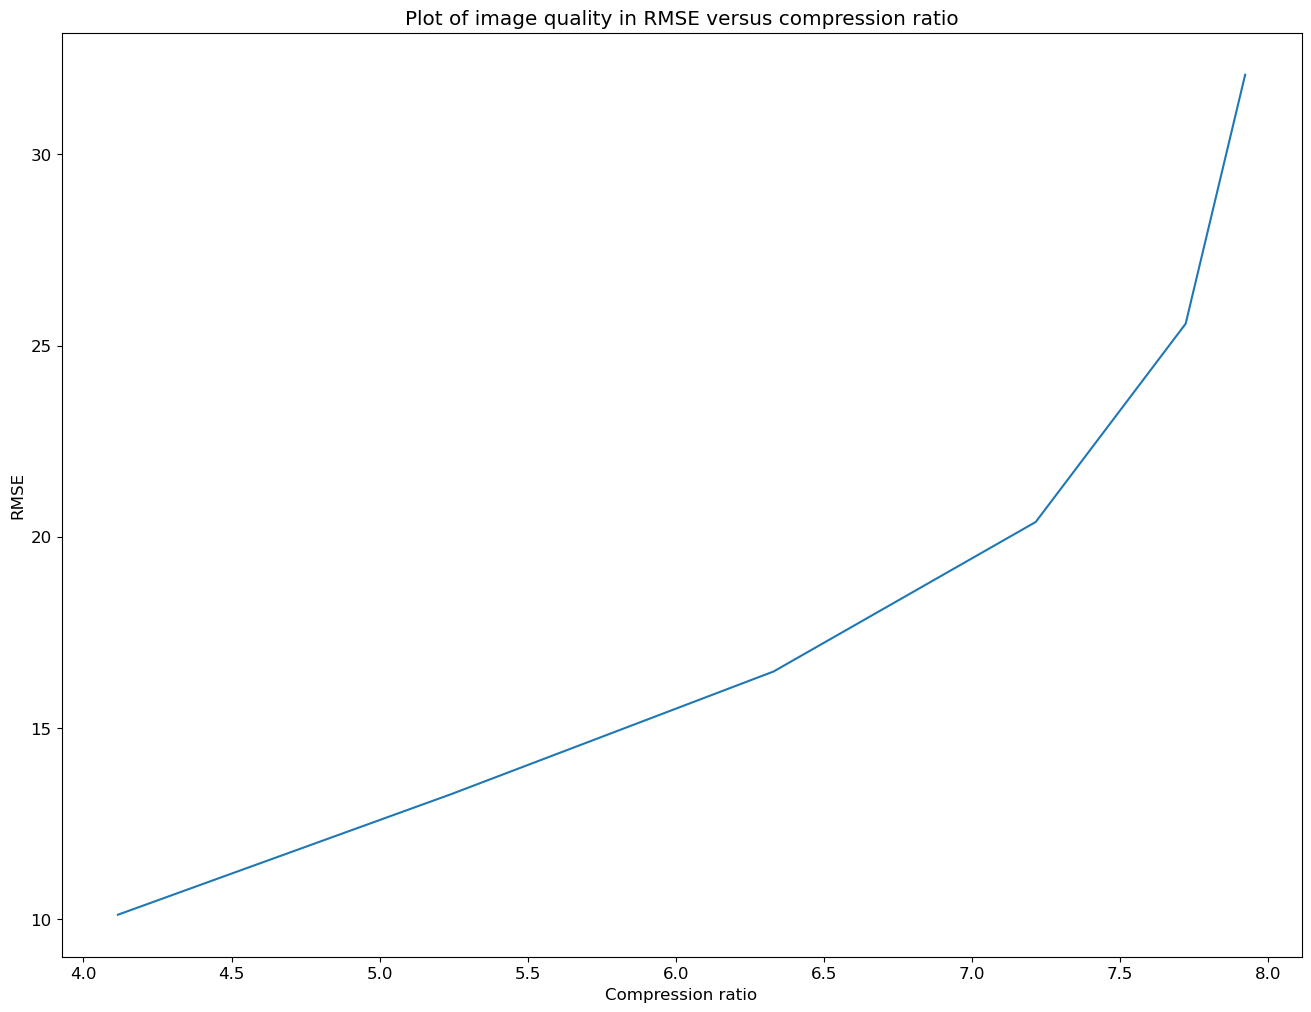

In [93]:
plt.figure(figsize=(16, 12)) 
plt.plot(com_ratio,RMSE_com)
plt.xlabel('Compression ratio')
plt.ylabel('RMSE')
plt.title('Plot of image quality in RMSE versus compression ratio')
plt.show()

We visualize the reconstructed image for each of the six scale factors in a 2×3 subplot similar to Figure 8.28 in the textbook.

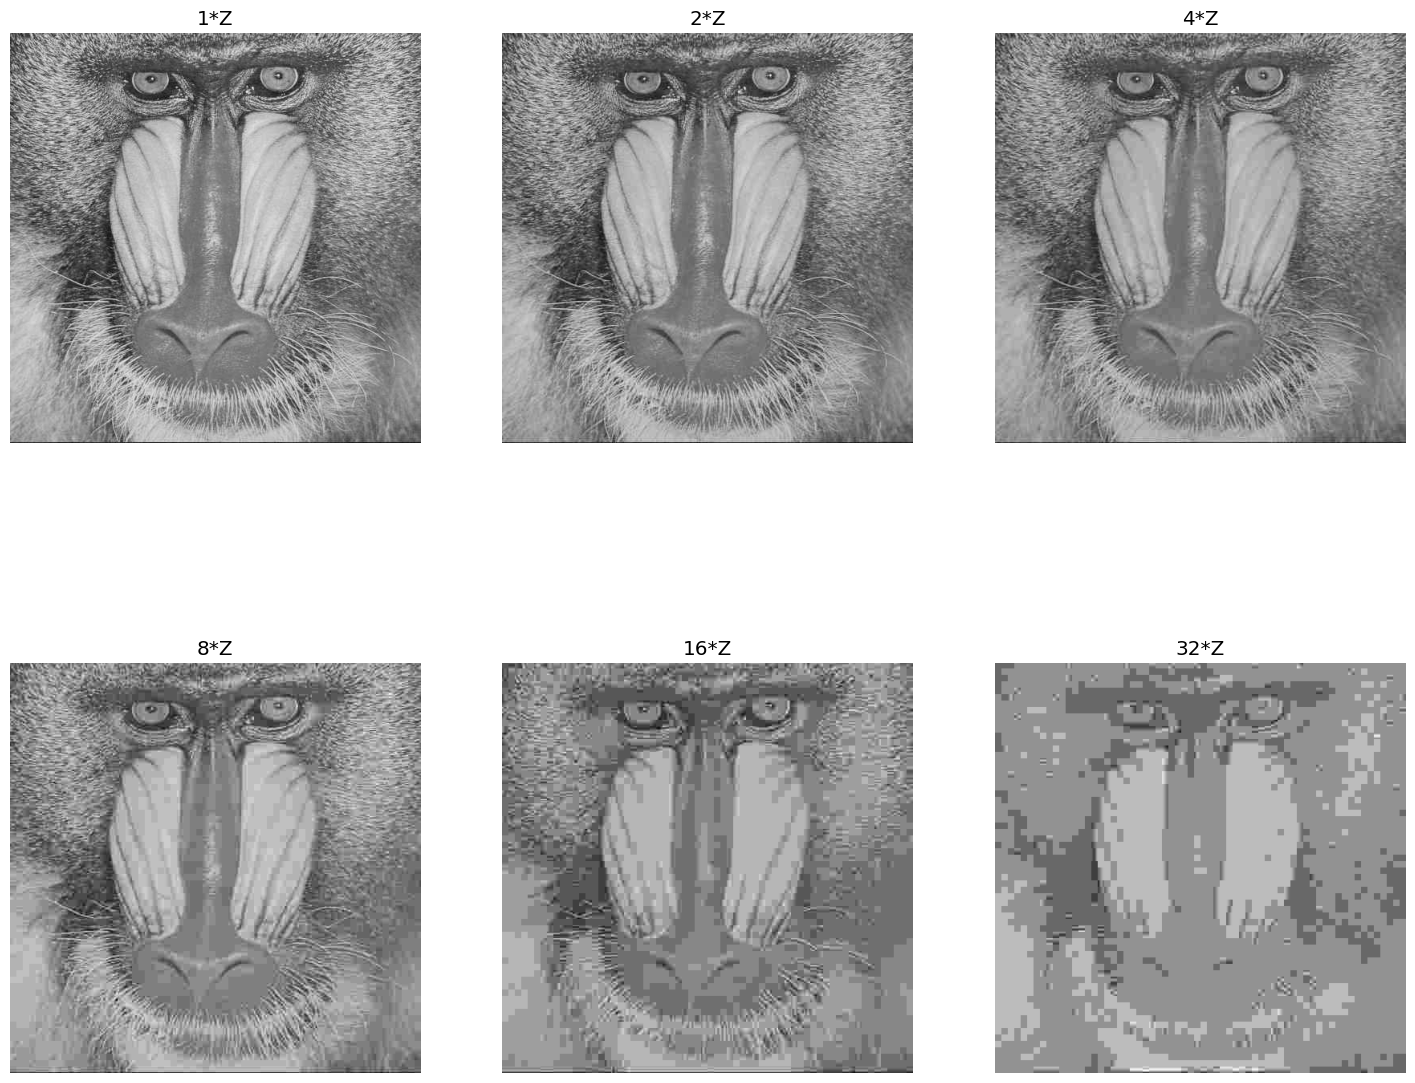

In [95]:
# Displaying the images
plt.figure(figsize=(18, 15)) 
for i in range(len(sc)):
    plt.subplot(2, 3, i+1) # (rows, columns, panel number)
    plt.imshow(compresses_Image[:,:,i], cmap='gray')
    plt.axis('off')
    plt.title('%d*Z' %sc[i])
plt.show()

From the plot of compression ratio versus scale factor, we find that when we increase the scale factor, compression ratio increases. On the other hand, from the plot of image quality in RMSE versus compression ratio, we find that when we increase the compression ratio, RMSE increases. This means that with the increment of compression ratio, quality of the image degrades. By observing the reconstructed images, we find that with the increament of scale factor or compression ratio, the quality of the image degrades. For smaller scale factor or compression ratio, the degradation is not too much, but with higher scale factor or compression ratio, the degradation of the compressed image increases rapidly.

## (e) General Huffman Tables:
In this part, we compute a general-purpose Huffman code table.

In [96]:
def huffman_codes_from_hist(h,be):
    '''
    HUFFMAN_CODES_FROM_HIST [huff_codes,rev_huff_codes] = 
huffman_codes_from_hist(h,be)
    This function computes a huffman code dictionary for the histogram h and 
associated
    bin centers.
    Inputs: h: vector - The histogram of intensities
            be: vector - The bin edges associated with h, i.e., the integer 
intensity values
    Outputs: huff_codes: dictionary - The forward code where the keys are strings 
consisting
                                      of the intensities, e.g., '213' and the 
values are 
                                      strings consisting of the binary codewords, 
e.g., 
                                      '1001110'
             rev_huff_codes: dictionary - The reverse code where the keys are 
strings 
                                          consisting of the binary codewords, e.g.,
'1001110'
                                          and the values are strings consisting of 
the 
                                          intensities, e.g., '213'
    Written by Laura Boucheron 10/18/2020
    Notes:
    No error checking included here.  
    '''
    
    # Set zero probability entries to arbitrarily small, but non-zero value
    h[h==0] = 1
    
    h = h/len(h) # normalize histogram
    be = be.astype(int)
    
    # Create list of probabilities (zeroth column) and intensities (first column)
    h_be = list(zip(h,be.astype(str))) # cast intensities as strings to interpret as symbols
                          
    # Create copy of list of probabilities and intensities to modify in loop below
    h_be2 = h_be.copy()
    # Sort in ascending order of probabilities
    h_be2.sort()
    # Instantiate empty dictionary for Huffman codes (value to code word)
    huff_codes = {value[1]: None for value in h_be}
    # Loop over probabilities and merge two smallest until there is only one element left
    while len(h_be2)>1:
        prob0,values0_str = h_be2[0] # smallest probability
        prob1,values1_str = h_be2[1] # second smallest probability
        del h_be2[0:2] # remove the two smallest probabilities from the working list
        # Grab all symbols corresponding to the two probabilities in question
        values0 = values0_str.split(',') 
        values1 = values1_str.split(',') 
        # Loop over all symbols and prepend a zero to all symbols in the smallest probability 
        for value0 in values0: # 
            if huff_codes[value0]==None:
                huff_codes[value0] = '0'
            else:
                huff_codes[value0] = '0'+huff_codes[value0]
        # Loop over all symbols and prepend a one to all symbols in the second smallest probability
        for value1 in values1:
            if huff_codes[value1]==None:
                huff_codes[value1] = '1'
            else:
                huff_codes[value1] = '1'+huff_codes[value1]
    
        # Append the new merged probability and merged string of symbols
        h_be2.append((prob0+prob1,values0_str+','+values1_str))
        
        # Sort in ascending order of probabilities
        h_be2.sort()
    # Compute reverse Huffman code dictionary (code word to value)
    rev_huff_codes = {v: k for k, v in huff_codes.items()}
    
    # Return Huffman code dictionary and reverse Huffman code dictionary
    return huff_codes, rev_huff_codes
        

## (e-i) Compute General Huffman Table:
We loop over the 200 training images in the BSDS300 dataset, convert each image to grayscale and zero pad each image so that its number of rows and columns are integer multiples of 8. Each grayscale image range is in [0,255]. We compute the block transform of the image (i.e., perform offset, and compute the 8×8 tiled DCT, rounded to the nearest integer) and use the default normalization matrix Z. Using the block transform image, we compute its length- M unnormalized histogram, i.e., the histogram of counts not probabilities. We accumulate the length- M unnormalized histogram for each of the images in the BSDS300 dataset and call this accumulated histogram <b>h_acc</b>. We use <b>huffman_codes_from_hist.py</b> function to compute Huffman
code tables for the accumulated statistics of pixels across the BSDS300 dataset and call these code tables
huff_codes_acc and rev_huff_codes_acc. Then we plot a normalized version of <b>h_acc</b> as a bar
chart and compute and print the average code word length (average number of bits per pixel) for the
Huffman code <b>huff_codes_acc</b>. 

In [97]:
train_dir = 'BSDS300/images/train/'
image_filenames = sorted(glob.glob(train_dir+'*.jpg')) 

a=[]

for f,image_filename in enumerate(image_filenames):
    img_file = imageio.imread(image_filenames[f])
    img_gray=skimage.color.rgb2gray(img_file)
    
    M=img_gray.shape[0]
    N=img_gray.shape[1]
    row_pad=math.ceil(M/8)*8 - M
    col_pad=math.ceil(N/8)*8 - N
    img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
    
    min_val=img_pad.min()
    img_u=img_pad-min_val
    max_val=img_u.max()
    img_uint8=(img_u/max_val)*255
    
    I_offset=img_uint8-128

    I_DCT1=generating_DCT_tiles(I_offset)
    I_DCT= (np.round(I_DCT1)).astype(int)

    I_DCT_hat=thresholding(I_DCT,1) # using 1*Z
    I_DCT_hat=I_DCT_hat.astype(int)
    
    maxx=np.amax(I_DCT_hat)
    a.append(maxx)
    minn=np.amin(I_DCT_hat)
    a.append(minn)
    



In [98]:
a_max=max(a) 
a_min=min(a)
nbins=a_max-a_min+1
nbins

142

In [99]:
train_dir = 'BSDS300/images/train/'
image_filenames = sorted(glob.glob(train_dir+'*.jpg')) 

hh=np.zeros((142,200))
for f,image_filename in enumerate(image_filenames):
    img_file = imageio.imread(image_filenames[f])
    img_gray=skimage.color.rgb2gray(img_file)
    
    M=img_gray.shape[0]
    N=img_gray.shape[1]
    row_pad=math.ceil(M/8)*8 - M
    col_pad=math.ceil(N/8)*8 - N
    img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
    
    min_val=img_pad.min()
    img_u=img_pad-min_val
    max_val=img_u.max()
    img_uint8=(img_u/max_val)*255
    
    I_offset=img_uint8-128

    I_DCT1=generating_DCT_tiles(I_offset)
    I_DCT= (np.round(I_DCT1)).astype(int)

    I_DCT_hat=thresholding(I_DCT,1) # using 1*Z
    I_DCT_hat=I_DCT_hat.astype(int)
    hist, bins=np.histogram(I_DCT_hat.flatten(),bins=nbins,range=(a_min,a_max+1))
    hh[:,f]=hist
    
    
    
    

In [100]:
h_acc=hh.sum(axis=1)
be=np.arange(a_min,a_max+1)
huff_codes_acc, rev_huff_codes_acc=huffman_codes_from_hist(h_acc, be)
tot=h_acc.sum()
norm_h_acc=h_acc/tot

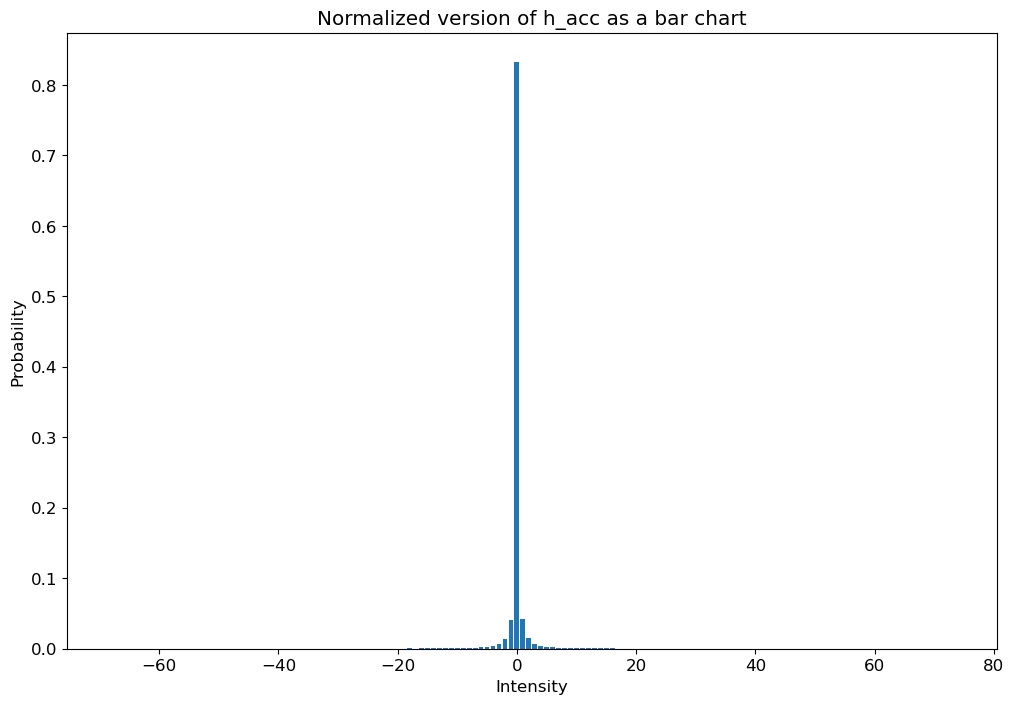

In [101]:
plt.figure(figsize=(12, 8)) 
plt.bar(be,norm_h_acc)
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.title('Normalized version of h_acc as a bar chart')
plt.show()

In [102]:
train_dir = 'BSDS300/images/train/'
image_filenames = sorted(glob.glob(train_dir+'*.jpg')) 

zz_a=[]
for f,image_filename in enumerate(image_filenames):
    img_file = imageio.imread(image_filenames[f])
    img_gray=skimage.color.rgb2gray(img_file)
    
    M=img_gray.shape[0]
    N=img_gray.shape[1]
    row_pad=math.ceil(M/8)*8 - M
    col_pad=math.ceil(N/8)*8 - N
    img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
    
    min_val=img_pad.min()
    img_u=img_pad-min_val
    max_val=img_u.max()
    img_uint8=(img_u/max_val)*255
    
    I_offset=img_uint8-128

    I_DCT1=generating_DCT_tiles(I_offset)
    I_DCT= (np.round(I_DCT1)).astype(int)

    I_DCT_hat=thresholding(I_DCT,1) # using 1*Z
    I_DCT_hat=I_DCT_hat.astype(int)
    I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes_acc)
    zz_a.append(len(I_bits_zz))
    

In [103]:
print('Average number of bits per pixel for huff_codes_acc: ', (np.mean(zz_a))/(I_DCT_hat.size))

Average number of bits per pixel for huff_codes_acc:  1.6619908911435424


We plot a normalized version of <b>h</b> as a bar chart and compute and print the average code word length (average number of bits per pixel) for the Huffman code <b>huff_codes</b>. 

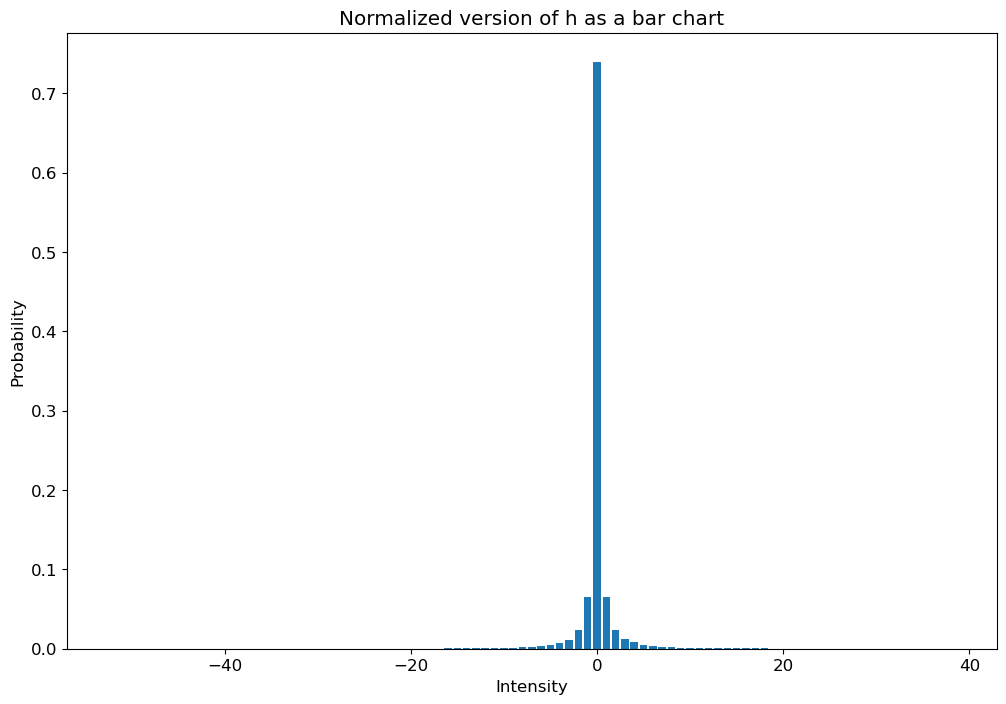

In [105]:
I = imageio.imread('mandrill.tif')
I_float=I.astype((np.double))
I_offset=I_float-128

I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)

I_DCT_hat=thresholding(I_DCT,1) # using 1*Z
I_DCT_hat=I_DCT_hat.astype(int)

mini=I_DCT_hat.min()
maxi=I_DCT_hat.max()
bin_num = maxi - mini + 1

h, bins=np.histogram(I_DCT_hat.flatten(),bins=bin_num,range=(mini,maxi+1))
tot1=h.sum()
norm_h=h/tot1 ### change it sum h

be_h=np.arange(mini,maxi+1)
plt.figure(figsize=(12, 8)) 
plt.bar(be_h,norm_h)
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.title('Normalized version of h as a bar chart')
plt.show()


In [106]:
huff_codes, rev_huff_codes = huffman_codes(I_DCT_hat)
I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes)
avg_bits=(len(I_bits_zz))/I_DCT_hat.size
print('Average number of bits per pixel for huff_codes: ', avg_bits)

Average number of bits per pixel for huff_codes:  1.9435005187988281


From the normalized version of <b>h_acc</b> and <b>h</b>, we find that the accumulated histogram and <b>mandrill.tif</b> image histogram seems quite similar, although the maximum peak of normalized histogram of <b>h_acc</b> is greater compared to maximum peak of normalized histogram of <b>h</b>. The average number of bits per pixel for <b>huff_codes_acc</b> is quite close to average number of bits per pixel for <b>huff_codes</b>.

## (e-ii) Compare Specific to General Huffman Table:
We repeat part (d-vi) using the <b>mandrill.tif</b> image and the <b>huff_codes_acc</b> and <b>rev_huff_codes_acc</b> Huffman code tables.

In [107]:
I = imageio.imread('mandrill.tif')
I_float=I.astype((np.double))
I_offset=I_float-128

I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)

sc=[1, 2, 4, 8, 16, 32]
b=I.shape[0]*I.shape[1]*8
com_ratio=[]
RMSE_com=[]

compresses_Image=np.zeros((512,512,6))
for i in range(len(sc)):
    scale=sc[i]
    I_DCT_hat=thresholding(I_DCT,scale)
    I_DCT_hat=I_DCT_hat.astype(int)
    I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes_acc)
    com_r=b/len(I_bits_zz)
    com_ratio.append(com_r)
    I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
    I_decoded_denorm=generating_decoded_denorm(I_decoded,scale)
    reconst_offset=generating_IDCT_tiles(I_decoded_denorm)
    reconstructed_image=reconst_offset + 128
    Final_reconstruct=(np.round(reconstructed_image)).astype(int)
    compresses_Image[:,:,i]=Final_reconstruct
    Final_reconstruct_float=Final_reconstruct.astype((np.double))
    MSE = np.square(np.subtract(I_float,Final_reconstruct_float)).mean() 
    RMSE=np.sqrt(MSE)
    RMSE_com.append(RMSE)

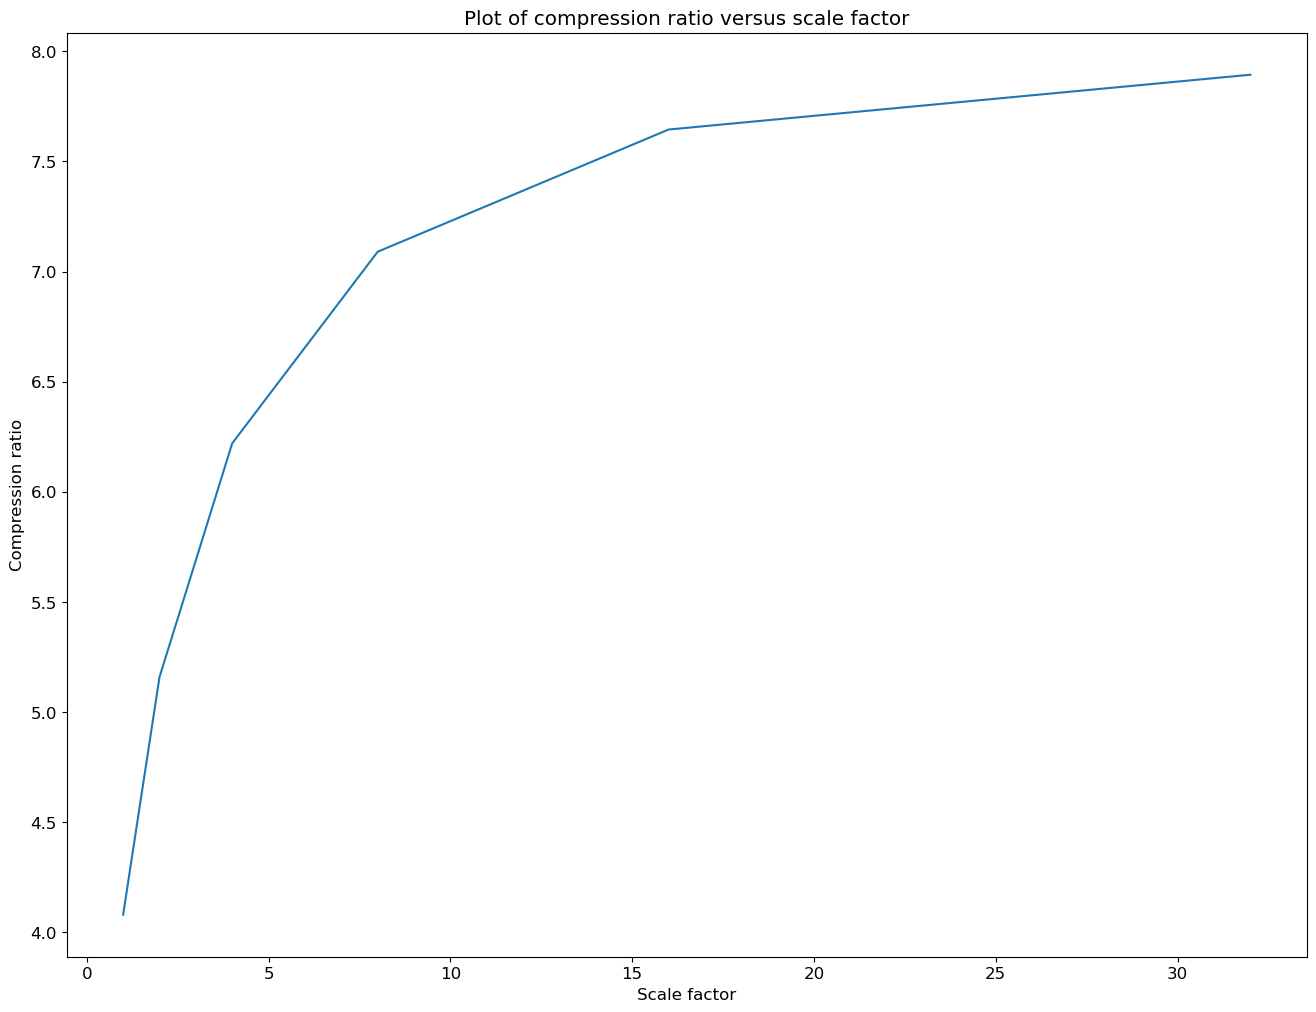

In [108]:
plt.figure(figsize=(16, 12)) 
plt.plot(sc,com_ratio)
plt.xlabel('Scale factor')
plt.ylabel('Compression ratio')
plt.title('Plot of compression ratio versus scale factor')
plt.show()

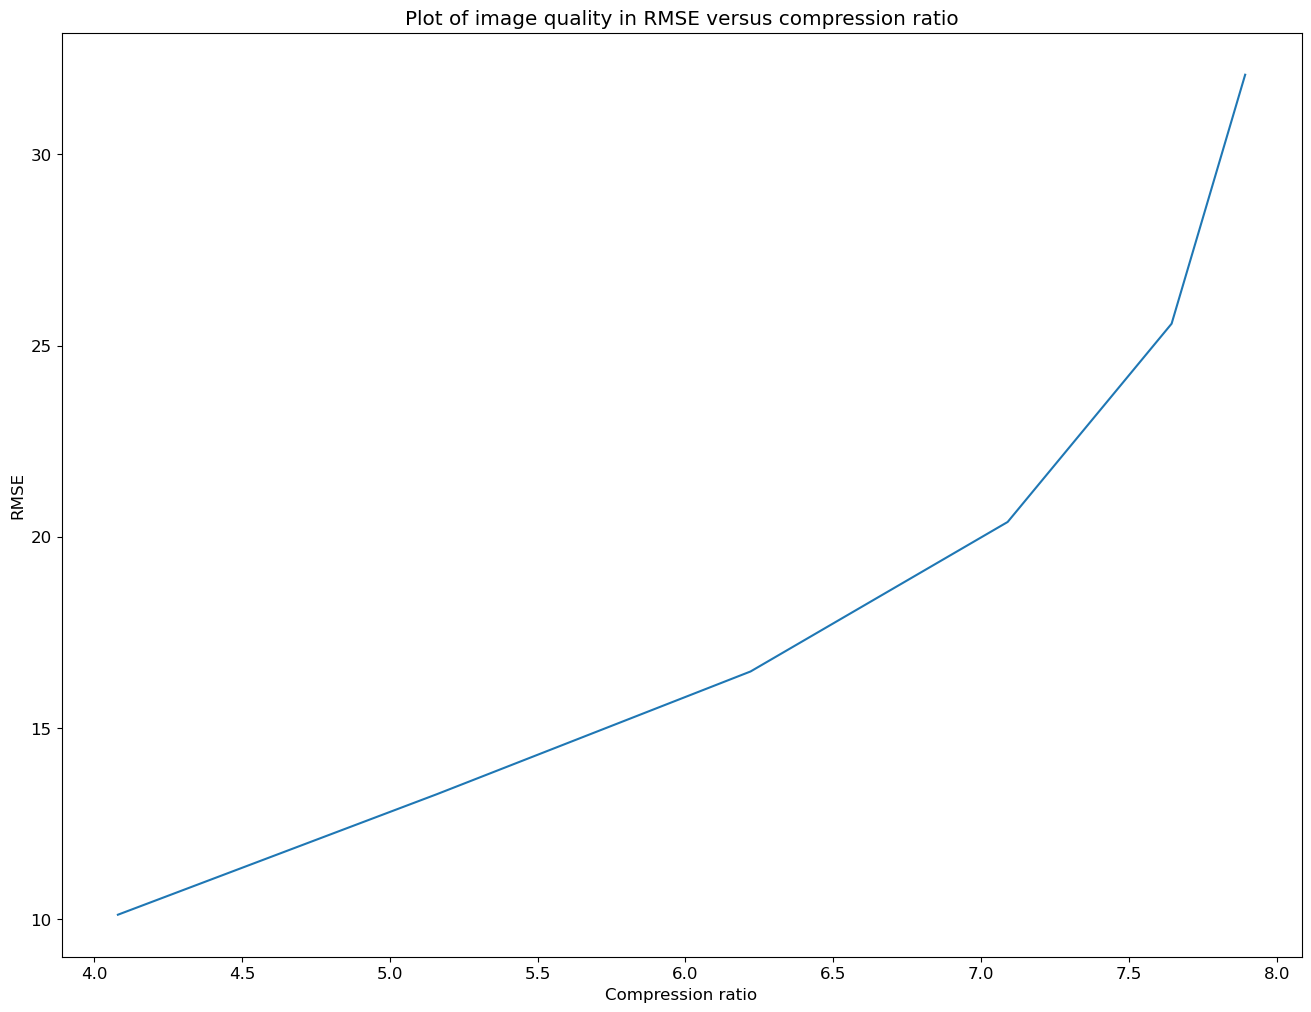

In [110]:
plt.figure(figsize=(16, 12)) 
plt.plot(com_ratio,RMSE_com)
plt.xlabel('Compression ratio')
plt.ylabel('RMSE')
plt.title('Plot of image quality in RMSE versus compression ratio')
plt.show()

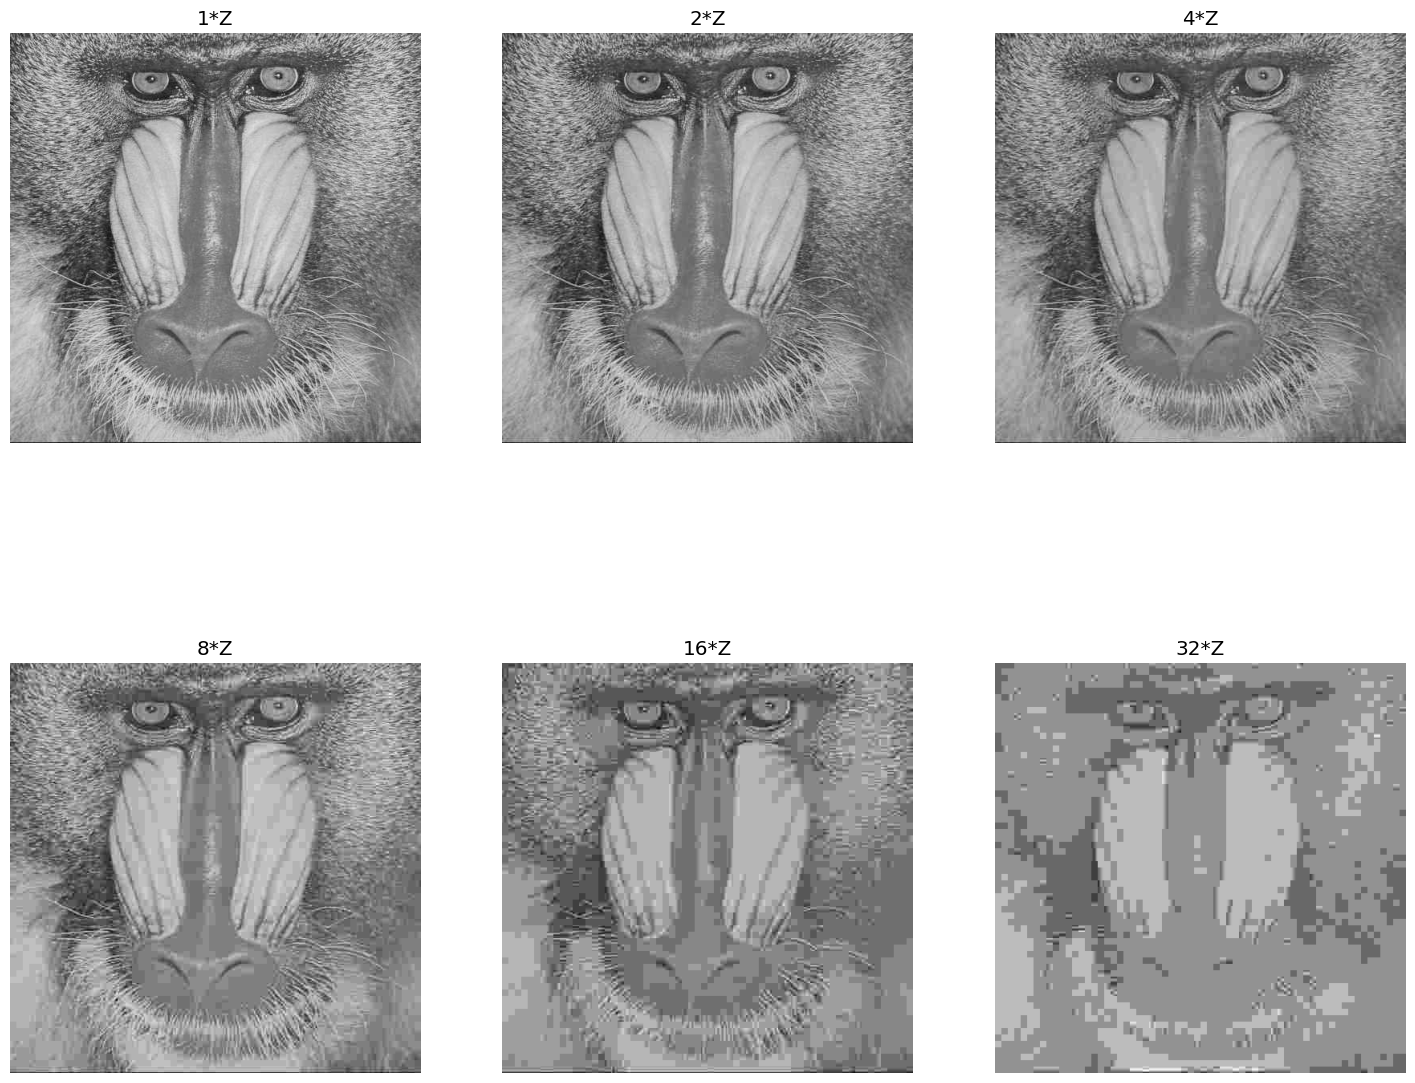

In [112]:
# Displaying the images
plt.figure(figsize=(18, 15)) 
for i in range(len(sc)):
    plt.subplot(2, 3, i+1) # (rows, columns, panel number)
    plt.imshow(compresses_Image[:,:,i], cmap='gray')
    plt.axis('off')
    plt.title('%d*Z' %sc[i])
plt.show()

The results from this part appears qualitatively similar compared to part (d-vi). They are numerically very close. This happens because general huffman table covers the intensity range of <b>mandrill.tif</b> image.

## (e-iii) Compute Average Compression Ratio versus Average Quality:

In [113]:
def huffman_encoder_zz(I,huff_codes):
    M=I.shape[0]
    N=I.shape[1]
    I_bits_zz = "".join((f'{M:010b}', f'{N:010b}'))
    zigzag_encoder=[]
    for i in range(0, I.shape[0], 8):
        for j in range(0, I.shape[1], 8):
            I2=np.zeros((8,8))
            I2=I[i:i+8, j:j+8]
            for k in range(64):
                index=np.where(matrix==k)
                pix=(I2[index[0], index[1]]).tolist()
                zigzag_encoder.append(pix)
    En=[ii for List in zigzag_encoder for ii in List]
    for jj in range(len(En)):
        pix_str= str(En[jj])
        code_str=huff_codes[pix_str]
        I_bits_zz = "".join((I_bits_zz, code_str))
    
    return I_bits_zz
        
 

We generate a plot of average compression ratio versus scale factors [1,2,4,8,16,32] of the normalization matrix Z where the average compression ratio is across the 100 BSDS test images. We generate a plot of average image quality in RMSE versus average compression ratio. We choose to compare zero-padded images because it simplifies whole comparison. As while computing compression ratio, we use zero-padded images, we also use zero-padded images for image quality comparison. 

In [114]:
test_dir = 'BSDS300/images/test/'
image_filenames = sorted(glob.glob(test_dir+'*.jpg')) 

sc=[1, 2, 4, 8, 16, 32]
avg_com_ratio=[]
avg_RMSE_com=[]

for i in range(len(sc)):
    scale=sc[i]
    com_ratio=[]
    RMSE_com=[]
    for f,image_filename in enumerate(image_filenames):
        img_file = imageio.imread(image_filenames[f])
        img_gray=skimage.color.rgb2gray(img_file)
    
    
        M=img_gray.shape[0]
        N=img_gray.shape[1]
        row_pad=math.ceil(M/8)*8 - M
        col_pad=math.ceil(N/8)*8 - N
        img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
    
        min_val=img_pad.min()
        img_u=img_pad-min_val
        max_val=img_u.max()
        img_uint8=(img_u/max_val)*255
        
        ## Using zero padded image size to compute total bits 
        b=img_uint8.shape[0]*img_uint8.shape[1]*8
    
        I_offset=img_uint8-128

        I_DCT1=generating_DCT_tiles(I_offset)
        I_DCT= (np.round(I_DCT1)).astype(int)

        I_DCT_hat=thresholding(I_DCT,scale) 
        I_DCT_hat=I_DCT_hat.astype(int)
    
        I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes_acc)
        com_r=b/len(I_bits_zz)
        com_ratio.append(com_r)
    
        I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
        I_decoded_denorm=generating_decoded_denorm(I_decoded,scale)
        reconst_offset=generating_IDCT_tiles(I_decoded_denorm)
        reconstructed_image=reconst_offset + 128
        Final_reconstruct=(np.round(reconstructed_image)).astype(int)
        Final_reconstruct_float=Final_reconstruct.astype((np.double))
        ## Using zero padded image size to compute MSE 
        MSE = np.square(np.subtract(img_uint8,Final_reconstruct_float)).mean() 
        RMSE=np.sqrt(MSE)
        RMSE_com.append(RMSE)
        
    avg_com_ratio.append(np.mean(com_ratio))
    avg_RMSE_com.append(np.mean(RMSE_com))
    
        
    


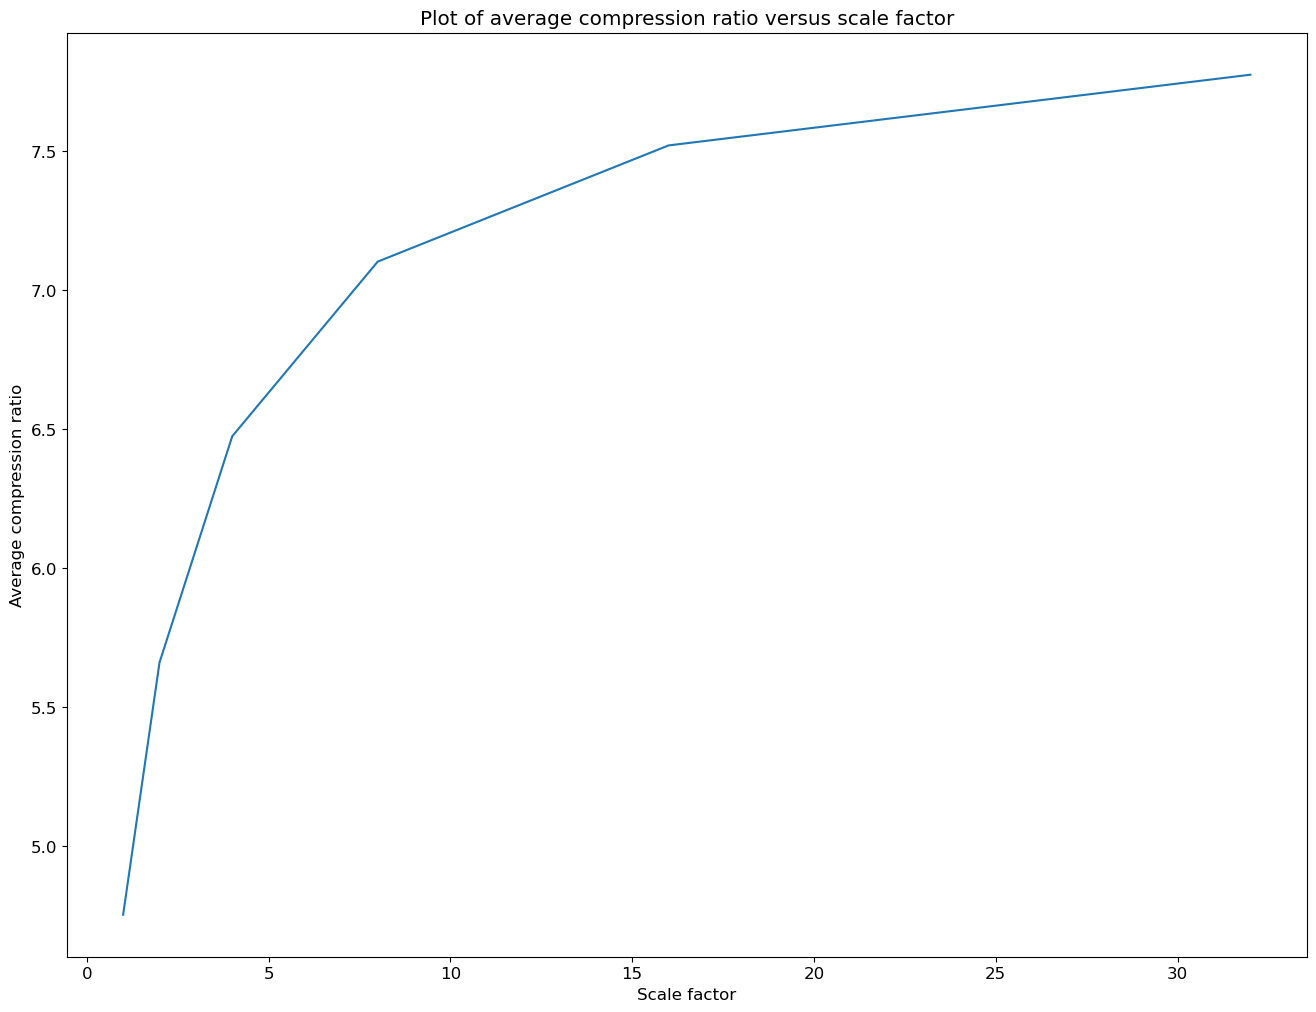

In [115]:
plt.figure(figsize=(16, 12)) 
plt.plot(sc,avg_com_ratio)
plt.xlabel('Scale factor')
plt.ylabel('Average compression ratio')
plt.title('Plot of average compression ratio versus scale factor')
plt.show()

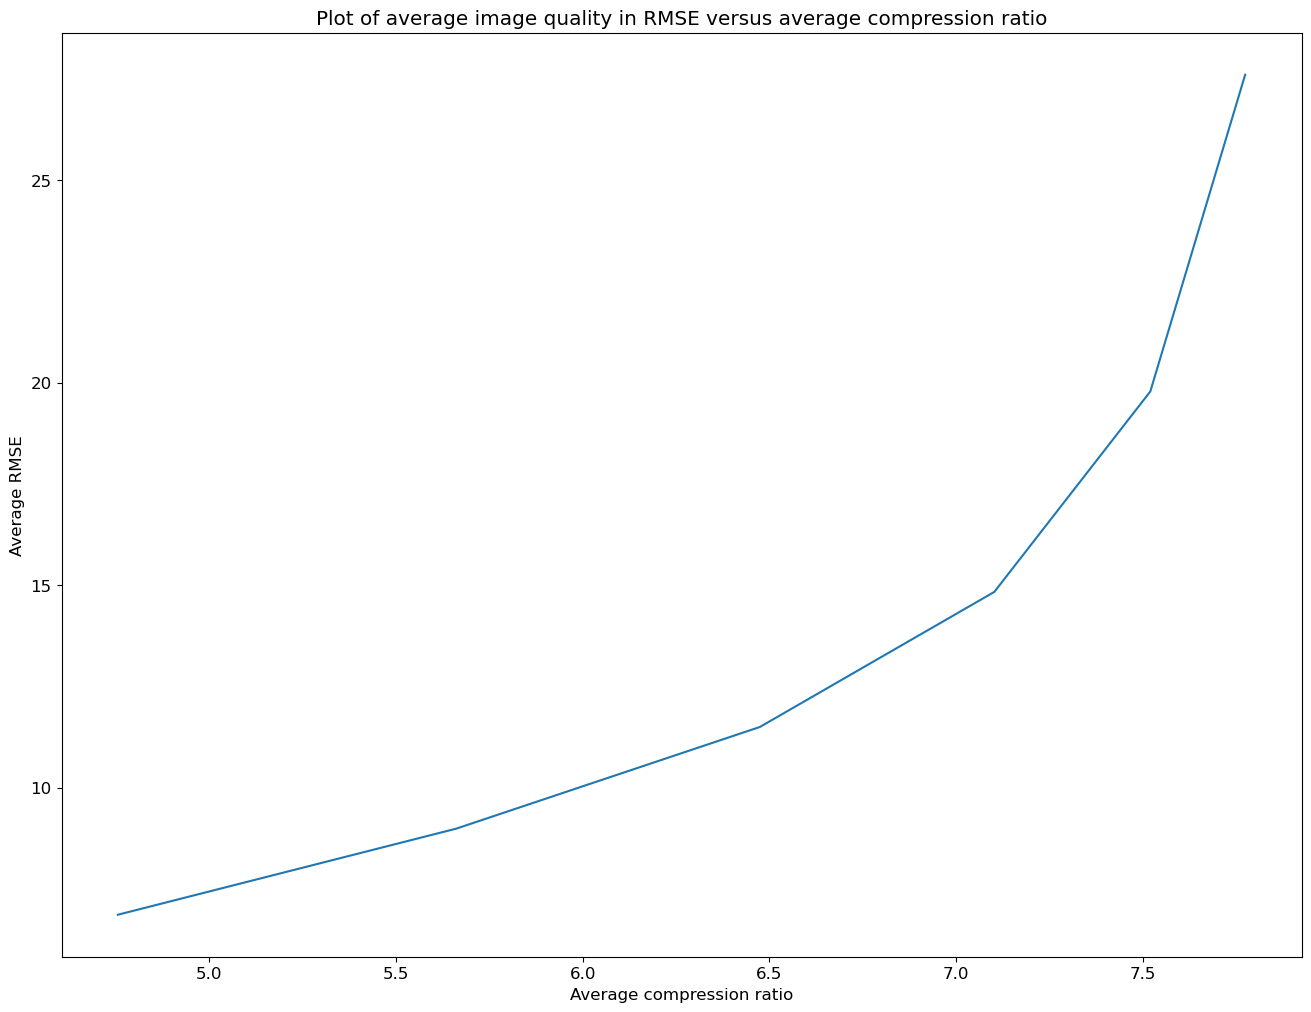

In [116]:
plt.figure(figsize=(16, 12)) 
plt.plot(avg_com_ratio,avg_RMSE_com)
plt.xlabel('Average compression ratio')
plt.ylabel('Average RMSE')
plt.title('Plot of average image quality in RMSE versus average compression ratio')
plt.show()

By observing the plots, we find that the results from this part seems very similar and consistent compared to part (d-vi).

## (e-iv) Explore the Variation in Compression Ratio:
For the nominal normalization matrix Z, we determine which of the 100 BSDS test images had the largest compression ratio. We display the grayscale version of that original image and the grayscale version of the reconstructed image along with its compression ratio and RMSE. We repeat for the image with the smallest compression ratio.

In [124]:
test_dir = 'BSDS300/images/test/'
image_filenames = sorted(glob.glob(test_dir+'*.jpg')) 

scale=1
com_ratio=[]
RMSE_com=[]

for f,image_filename in enumerate(image_filenames):
    img_file = imageio.imread(image_filenames[f])
    img_gray=skimage.color.rgb2gray(img_file)
    M=img_gray.shape[0]
    N=img_gray.shape[1]
    row_pad=math.ceil(M/8)*8 - M
    col_pad=math.ceil(N/8)*8 - N
    img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
    min_val=img_pad.min()
    img_u=img_pad-min_val
    max_val=img_u.max()
    img_uint8=(img_u/max_val)*255
        
    ## Using zero padded image size to compute total bits 
    b=img_uint8.shape[0]*img_uint8.shape[1]*8
    I_offset=img_uint8-128
    I_DCT1=generating_DCT_tiles(I_offset)
    I_DCT= (np.round(I_DCT1)).astype(int)
    I_DCT_hat=thresholding(I_DCT,scale) 
    I_DCT_hat=I_DCT_hat.astype(int)
    I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes_acc)
    com_r=b/len(I_bits_zz)
    com_ratio.append(com_r)
    I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
    I_decoded_denorm=generating_decoded_denorm(I_decoded,scale)
    reconst_offset=generating_IDCT_tiles(I_decoded_denorm)
    reconstructed_image=reconst_offset + 128
    Final_reconstruct=(np.round(reconstructed_image)).astype(int)
    Final_reconstruct_float=Final_reconstruct.astype((np.double))
    ## Using zero padded image size to compute MSE 
    MSE = np.square(np.subtract(img_uint8,Final_reconstruct_float)).mean() 
    RMSE=np.sqrt(MSE)
    RMSE_com.append(RMSE)

In [125]:
# test image with largest compression ratio

max_value=max(com_ratio)
max_index = com_ratio.index(max_value)

img_file = imageio.imread(image_filenames[max_index])
img_gray=skimage.color.rgb2gray(img_file)
M=img_gray.shape[0]
N=img_gray.shape[1]
row_pad=math.ceil(M/8)*8 - M
col_pad=math.ceil(N/8)*8 - N
img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
min_val=img_pad.min()
img_u=img_pad-min_val
max_val=img_u.max()
img_uint8=(img_u/max_val)*255
        
I_offset=img_uint8-128
I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)
I_DCT_hat=thresholding(I_DCT,1) 
I_DCT_hat=I_DCT_hat.astype(int)
I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes_acc)
I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
I_decoded_denorm=generating_decoded_denorm(I_decoded,1)
reconst_offset=generating_IDCT_tiles(I_decoded_denorm)
reconstructed_image=reconst_offset + 128
Final_reconstruct=(np.round(reconstructed_image)).astype(int)

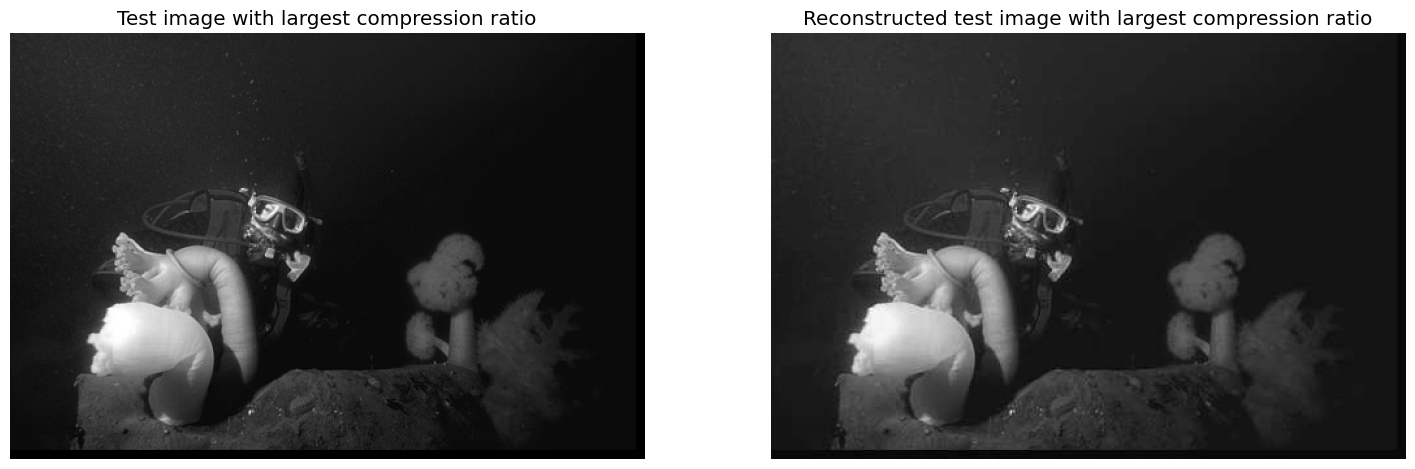

In [126]:
# Displaying the images
plt.figure(figsize=(18, 15))  
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(img_uint8, cmap='gray')
plt.axis('off')
plt.title('Test image with largest compression ratio')


plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(Final_reconstruct, cmap='gray')
plt.axis('off')
plt.title('Reconstructed test image with largest compression ratio')
plt.show()

In [127]:
print('Compression ratio for test image with largest compression ratio: ', com_ratio[max_index])
print('RMSE for test image with largest compression ratio: ', RMSE_com[max_index])

Compression ratio for test image with largest compression ratio:  6.129197779054183
RMSE for test image with largest compression ratio:  3.1838149076296394


In [128]:
# test image with smallest compression ratio

min_value=min(com_ratio)
min_index = com_ratio.index(min_value)

img_file = imageio.imread(image_filenames[min_index])
img_gray=skimage.color.rgb2gray(img_file)
M=img_gray.shape[0]
N=img_gray.shape[1]
row_pad=math.ceil(M/8)*8 - M
col_pad=math.ceil(N/8)*8 - N
img_pad=np.pad(img_gray, [(0,row_pad),(0,col_pad)], mode='constant')
min_val=img_pad.min()
img_u=img_pad-min_val
max_val=img_u.max()
img_uint8=(img_u/max_val)*255
        
I_offset=img_uint8-128
I_DCT1=generating_DCT_tiles(I_offset)
I_DCT= (np.round(I_DCT1)).astype(int)
I_DCT_hat=thresholding(I_DCT,1) 
I_DCT_hat=I_DCT_hat.astype(int)
I_bits_zz=huffman_encoder_zz(I_DCT_hat,huff_codes_acc)
I_decoded=huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
I_decoded_denorm=generating_decoded_denorm(I_decoded,1)
reconst_offset=generating_IDCT_tiles(I_decoded_denorm)
reconstructed_image=reconst_offset + 128
Final_reconstruct=(np.round(reconstructed_image)).astype(int)

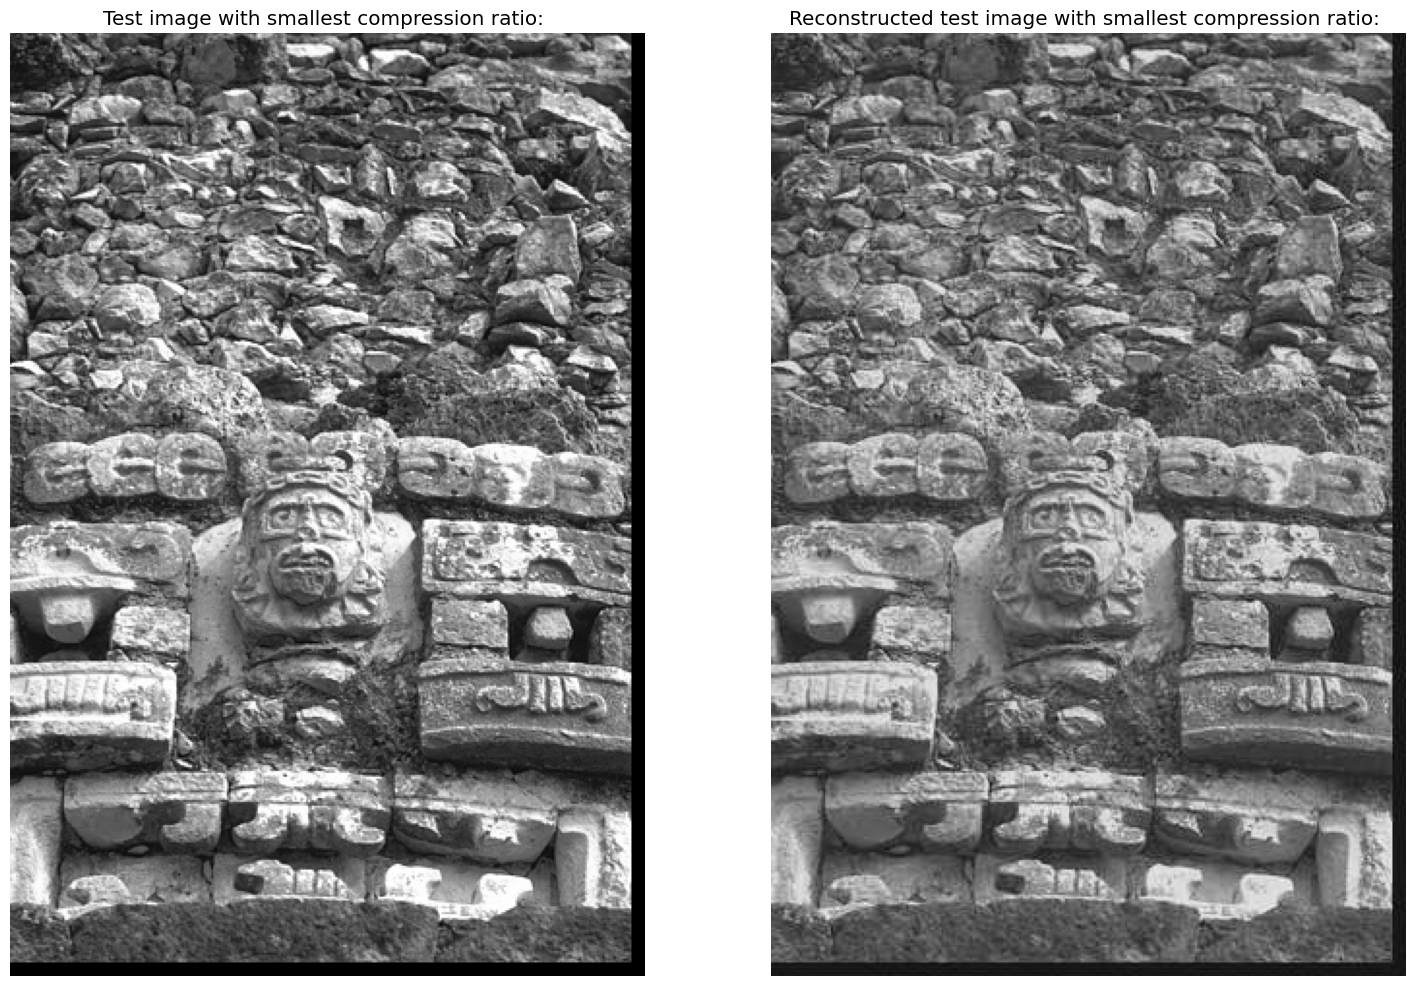

In [129]:
# Displaying the images
plt.figure(figsize=(18, 15))  
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(img_uint8, cmap='gray')
plt.axis('off')
plt.title('Test image with smallest compression ratio: ')


plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(Final_reconstruct, cmap='gray')
plt.axis('off')
plt.title('Reconstructed test image with smallest compression ratio: ')
plt.show()

In [130]:
print('Compression ratio for test image with smallest compression ratio: ', com_ratio[min_index])
print('RMSE for test image with smallest compression ratio: ', RMSE_com[min_index])

Compression ratio for test image with smallest compression ratio:  3.534221319393461
RMSE for test image with smallest compression ratio:  10.973862337250495


By observing the gray scale version of test images with largest and smallest compression ratio, we find that the test image with largest compression ratio is very easy to compress as it has very few high frequency DCT coefficients, as a result, using block transform coding with the DCT, largest compression ratio is achieved. The test image with smallest compression ratio is very difficult to compress as it has a large number of  high frequency DCT coefficients, as a result, using block transform coding with the DCT, smallest compression ratio is achieved.

## (f) Summary:

Image compression focuses on minimizing the number of bits required to represent an image. Image compression may be lossy or lossless. The entropy of the image tells us the minimum number of bits required to represent the image without any loss. If we respresnt the image with lesser bits compared to the number of bits with entropy calculation, the compressed image will be lossy. The quality of reconstructed image degrades less if the compression ratio is small, but quality of reconstructed image is worse with high compression ratio. Compresssed image with low compression ratio results in less RMSE value and compresssed image with high compression ratio results in larger RMSE value.

We learn that 8×8 DCT of an 8×8 image tile can be represented as a superposition of the 64 basis images. If we increase the number of bases retained, the RMSE between compressed image and original image decreases which indicates the improvement on image quality. We find that DCT domain has the most potential for compression from the entropy concept of an image, although we need to be very careful on selecting appropriate bits/pixel for compression to avoid lower image quality. We can encode the image for compression using Huffman Codec which is uniquely decodable. While encoding, the zigzag scanning of each tile of the image allows for longer runs of 0-valued coefficients. If the compression ratio increases, the bits needed to represent the image decreases, but the RMSE between the compressed image and original image increses which results in poor image quality with high compression ratio. This is as expected as the number of bits in compressed image is less than number of bits from entropy calculation.  We find that when the compression ratio increases, with smaller compression ratio, the RMSE increament is less. But after a certain increament of compression ratio, a small change in compression ratio results in very high RMSE value. The algorithm should result in consistent relationship between compression ratio and RMSE. In my view, selecting the normalization matrix is the biggest issue which affects the performance of compression algorithm. This is very important when we want to apply it to a dataset of images. Proper analyzation needs to be done with different types of images with different shapes containing very high to very low frequency DCT coefficient for selecting a proper normalization matrix.